# Telecom Churn Group Case Study
## Bhavini D. Gadhiwala & Sankalp Rusia

For the prepaid model of payment in the telecom industry, the aim to predict the churn of the customers that are at high risk in order to retain them. Customer retention is the number one business goal. 


<b> Problem statement</b>The aim of this report is to predict the churn for high-value customers - those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

#### Index<a id='index'></a>
- [Data Understanding](#dataUnderstandingSection).
- [Data Cleaning](#dataCleaning)
- [High Value Filter](#hvc)
- [Derivation of churn](#churn)
- [Exploratory Data Analysis](#eda)
- [Data Preparation](#dataPrep)
- [Model Building](#modelBuilding)
- [Model Evaluation](#modelEvaluation)

Please Note:
You can use the hyperlinks to go to the specific section. 
Since the runtime of some of the models was high, we have included the screenshot of the outcome for reference.

In [1]:
# Import the necessary library for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import modelling helpers
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Setting the columns that can be displayed to max as 100 and rows to 200
pd.set_option('display.max_columns', 300)
pd.options.display.max_rows = 300

# Setting formatting on the decimal values so that the coefficients are easy to read
pd.options.display.float_format = "{:,.6f}".format

### Data Understanding<a id='dataUnderstandingSection'></a>
Go to [Index](#index).

In [2]:
# reading the dataset in datafrae
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,n

In [3]:
# Check the shape of the dataset
df.shape

(99999, 226)

#### 99999 rows and 226 columns in the dataset

In [4]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [5]:
#Check the null values and datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


#### As we can see there are too many columns to display. Hence we shall explore the columns by divide and conquer strategy. That is to separate the columns and then explore each chunk to observe and deduce.

In [6]:
# Check the numerical columns and its stats
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.000000","99,999.000000","98,981.000000","98,981.000000","98,981.000000","99,999.000000","99,999.000000","99,999.000000","99,999.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.000000","92,254.000000","96,062.000000","96,140.000000","94,621.

#### The following observations can be made
- The column mobile_number can be considered as categorical and need not be used for the study. It can be removed from the dataset and brought back later to report based on predictions as a list of phone numbers predicted as a churn
- Since this is not a time-series forecast study, all the date columns can be removed as the information provided by them will not be used at all.
- The columns loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou are pertaining to the local outgoing, STD outgoing and local incoming call for call from operator T to the fixed line have zeroes as all its data values. This tells us the diminishing use or rather fixed lines getting obsolete with more usage of mobile.
- The columns std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9 also has all values as zeroes. We can drop them from the study. Similarly, std_ic_t2o_mou_6, std_ic_t2o_mou_7, std_ic_t2o_mou_8, std_ic_t2o_mou_9

### Data Cleaning<a id='dataCleaning'></a>
Go to [Index](#index).

In [7]:
# Looking for columns with date in the column name
date_cols=[col for col in df.columns if 'date' in col]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9']

12 date columns are not needed for analysis. Dropping them.

In [8]:
df.drop(date_cols,axis=1,inplace=True)

In [9]:
# Dropping other columns observed in the df.describe() with all values as zeroes.
L=['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']
df.drop(L,axis=1,inplace=True)

In [10]:
df.shape

(99999, 203)

##### Handling Missing values

In [11]:
# Creating a pandas series of column names and their percentage missing values
missing = df.isna().sum()/df.shape[0]*100

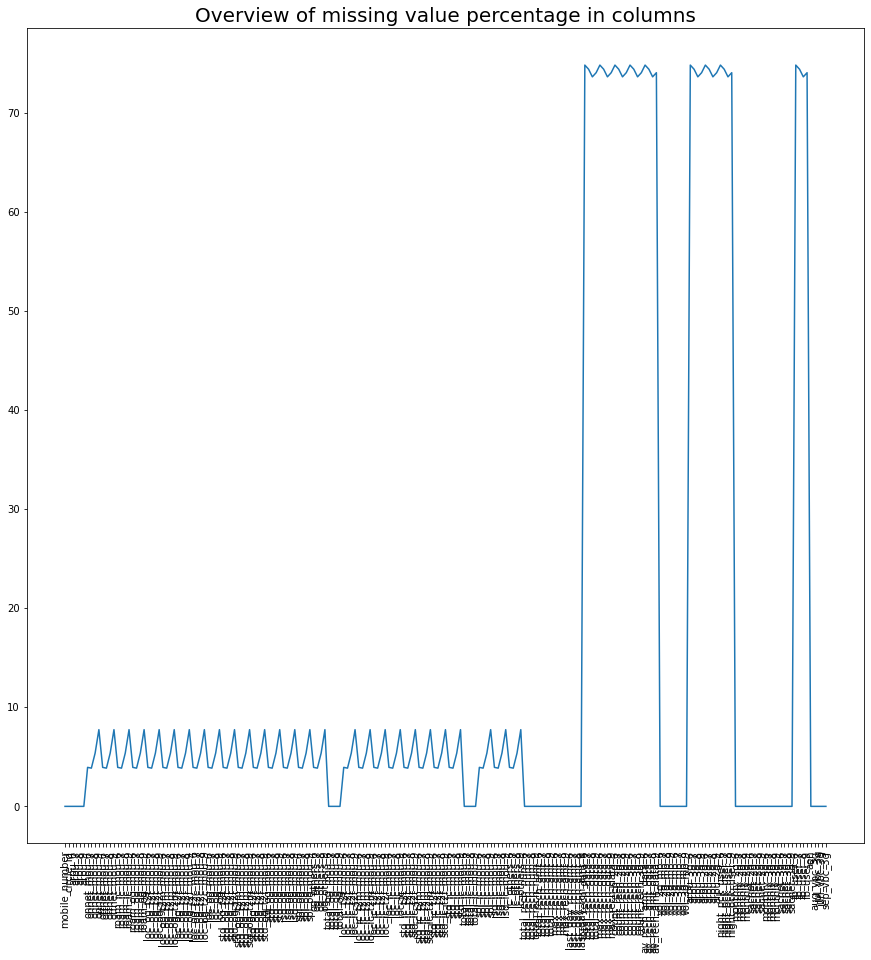

In [12]:
# Convert pandas series to dataframe 
df1 = pd.DataFrame(missing,columns=['% of Missing value'])

# Charting out the missing values percentage to get an overview of the amount of missing values
plt.figure(figsize=(15,15))
plt.title('Overview of missing value percentage in columns',fontsize=20)
plt.xticks(rotation=90)
plt.plot(df1)
plt.show();

#### We can see from this plot that there are two types of missing values columns. There are some columns with missing values under 10% or less which can be imputed and others have nearly more than 70% missing values. This we will discard from the study.

In [13]:
# dropping all columns where missing value is greater than 50%
above50pct_missing = list(df1[df1['% of Missing value']>50].index)
df.drop(above50pct_missing, inplace=True,axis=1)
df.shape

(99999, 167)

##### As we can see total number of incoming calls ( total_ic_mou_8	) and outgoing calls ( total_og_mou_8 ) are zero for month 8. Hence all columns related to incoming and outgoing calls are filled with 0

##### We follow the same approach for month 6 and month 7 columns

In [14]:
# analysing missing columns from month 6
jun_cols=[col for col in df.columns if '_6' in col]
df[df.loc_ic_mou_6.isna()][jun_cols]

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6
0,197.385000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,4,362,252,252,30.130000,83.570000,0,0,1,0
15,31.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
26,0.010000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0,0,0,0,0.000000,0.000000,0,0,0,0
37,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,2,0,0,0,0.000000,0.000000,0,0,0,0
51,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99867,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,2,0,0,0,0.000000,0.000000,0,0,0,0
99871,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,3,0,0,0,0.000000,0.000000,0,0,0,0
99914,20.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,3,0,0,0,0.000000,0.000000,0,0,0,0
99978,30.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0


In [15]:
# analysing missing columns from month 7
july_cols=[col for col in df.columns if '_7' in col]
df[df.loc_og_mou_7.isna()][july_cols]

,arpu_7,onnet_mou_7,offnet_mou_7,roam_ic_mou_7,roam_og_mou_7,loc_og_t2t_mou_7,loc_og_t2m_mou_7,loc_og_t2f_mou_7,loc_og_t2c_mou_7,loc_og_mou_7,std_og_t2t_mou_7,std_og_t2m_mou_7,std_og_t2f_mou_7,std_og_mou_7,isd_og_mou_7,spl_og_mou_7,og_others_7,total_og_mou_7,loc_ic_t2t_mou_7,loc_ic_t2m_mou_7,loc_ic_t2f_mou_7,loc_ic_mou_7,std_ic_t2t_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_ic_mou_7,total_ic_mou_7,spl_ic_mou_7,isd_ic_mou_7,ic_others_7,total_rech_num_7,total_rech_amt_7,max_rech_amt_7,last_day_rch_amt_7,vol_2g_mb_7,vol_3g_mb_7,monthly_2g_7,sachet_2g_7,monthly_3g_7,sachet_3g_7
0,214.816000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,3,252,252,252,1.320000,150.760000,0,0,1,0
10,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
35,13.448000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,2,0,0,0,0.000000,0.000000,0,0,0,0
45,7.500000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,5,0,0,0,0.000000,0.000000,0,0,0,0
68,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0,0,0,0,0.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99948,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,3,0,0,0,0.000000,0.000000,0,0,0,0
99978,31.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0,0,0,0,0.000000,0.000000,0,0,0,0
99993,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0,0,0,0,0.000000,0.000000,0,0,0,0
99996,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,2,0,0,0,0.000000,0.000000,0,0,0,0


In [16]:
# analysing missing columns from month 8
aug_cols=[col for col in df.columns if '_8' in col]
df[df.std_ic_t2t_mou_8.isna()][aug_cols]

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
35,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
45,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
111,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,5,0,0,0,0.000000,0.000000,0,0,0,0
129,-5.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,3,0,0,0,0.000000,0.000000,0,0,0,0
138,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,"2,411.850000",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
99983,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,0,0,0,0.000000,0.000000,0,0,0,0
99993,80.387000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,1,94,94,94,0.000000,0.000000,0,0,0,0
99996,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,nan,nan,nan,0,0,0,0,0.000000,0.000000,0,0,0,0


In [17]:
# filling missing values of all columns except month 9 columns and date columns

for col in df1[df1['% of Missing value']<=50].index:
    if '_9' not in col and 'date' not in col:
        df[col].fillna(0,inplace=True)


In [18]:
missing = df.isna().sum()/df.shape[0]*100
df1 = pd.DataFrame(missing,columns=['% of Missing value'])
df2 = df1[df1['% of Missing value']>0].sort_values(by='% of Missing value',ascending=False)
df2

,% of Missing value
onnet_mou_9,7.745077
spl_og_mou_9,7.745077
isd_ic_mou_9,7.745077
spl_ic_mou_9,7.745077
std_ic_mou_9,7.745077
std_ic_t2f_mou_9,7.745077
std_ic_t2m_mou_9,7.745077
std_ic_t2t_mou_9,7.745077
loc_ic_mou_9,7.745077
loc_ic_t2f_mou_9,7.745077


In [19]:
df.shape

(99999, 167)

##### 59 columns removed after handling missing values

In [20]:
df.circle_id.value_counts()

109    99999
Name: circle_id, dtype: int64

#### The entire dataset is for circle_id = 109. Removing that column too as it does not provide any extra information and hence will not be used for modelling.

In [21]:
df.drop('circle_id',axis=1,inplace=True)

In [22]:
# Let's check the shape again
df.shape

(99999, 166)

### Filtering High Value customers<a id='hvc'></a>
Go to [Index](#index).

In [23]:
# calculating and deriving avg recharge amt for the months 6 and 7
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2

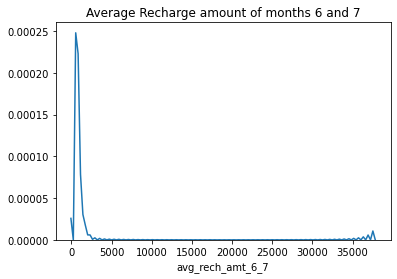

In [24]:
# Plotting the distribution plot of the Average Recharge amount of months 6 and 7 
plt.title('Average Recharge amount of months 6 and 7')
sns.distplot(df['avg_rech_amt_6_7'], hist=False);

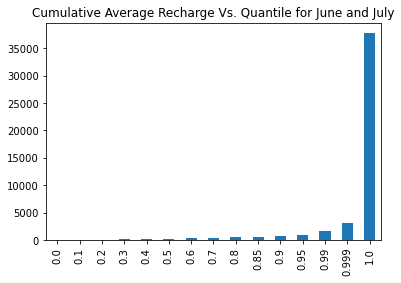

In [25]:
# This graph shows the Pareto Principle of 80-20 rule that 80% of revenue is generated by top 20% of our customers
plt.title('Cumulative Average Recharge Vs. Quantile for June and July')
df['avg_rech_amt_6_7'].quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.9,0.95,0.99,0.999,1]).plot.bar();

#### The Pareto Principle of 80-20 rule states that 80% of revenue is generated by top 20% of customers. This can be visualized in our case by the graph above which depicts the revenue vs the quantile range. As a conservative approach, we will take only the top 30% of our customers for our study.

In [26]:
# filtering out top 30% customers. Finding 70 the percentile
df = df[df.avg_rech_amt_6_7>=df.avg_rech_amt_6_7.quantile(0.70)]
df.shape

(30011, 167)

In [27]:
# dropping avg amt column as we do not need it anymore
df.drop(['avg_rech_amt_6_7'],inplace=True,axis=1)
df.shape

(30011, 166)

### Deriving Churn Variable<a id='churn'></a>
Go to [Index](#index).

In [28]:
df['churn'] = df.apply(lambda x: 1 if x['total_ic_mou_9']==0 and x['total_og_mou_9']==0 and  x['vol_2g_mb_9']==0 and  x['vol_3g_mb_9']==0 else 0,axis=1 )

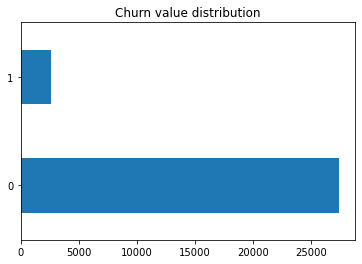

In [29]:
df['churn'].value_counts().plot.barh()
plt.title('Churn value distribution')
plt.show()

#### The churn value distribution clearly shows data imbalance in the class. We will be handling this with the SMOTE (Synthetic Minority Oversampling Technique) in the Data Preparation step.

In [30]:
df['churn'].value_counts(normalize=True)

0   0.913598
1   0.086402
Name: churn, dtype: float64

#### We can see the data imbalance here as less than 9% of data has positive churn value

In [31]:
# Making churn as a categorical column
df['churn'] = df['churn'].astype('object')

In [32]:
# Removing all month 9 columns as they are used to derive the churn variable and will not be needed further for analysis
sep_cols=[col for col in df.columns if '_9' in col or 'sep' in col]
df.drop(sep_cols,inplace=True,axis=1)

In [33]:
# Checking shape again
df.shape

(30011, 126)

In [34]:
# Just to ensure that there is no more missing data
missing = df.isna().sum()/df.shape[0]*100
df1 = pd.DataFrame(missing,columns=['% of Missing value'])
df2 = df1[df1['% of Missing value']>0].sort_values(by='% of Missing value',ascending=False)
df2

,% of Missing value


#### Hence we can say the data is clean


### Exploratory Data Analysis<a id='eda'></a>
Go to [Index](#index).

In [35]:
# Holding the mobile_number in a column for probable later use as we do not want to discard is right away
hold_mobile_number=df.pop('mobile_number')

#### Since there are over 40 columns for each month, we did the univariate analysis on corresponding cumulative column made by adding the data from all the three months.

In [36]:
# Creating a cumulative column for data analysis 
# It will be a cumulative of data from month 6,7,8 
for col in jun_cols:
    jun_data=df[col]
    jul_data=df[col.replace("6","7")]
    aug_data=df[col.replace("6","8")]
    df[col.replace("6","cumulative")]=jun_data+jul_data+aug_data

In [37]:
# The following columns were created with _cumulative extensions
cumulative_cols=[col for col in df.columns if 'cumulative' in col]
cumulative_cols

['arpu_cumulative',
 'onnet_mou_cumulative',
 'offnet_mou_cumulative',
 'roam_ic_mou_cumulative',
 'roam_og_mou_cumulative',
 'loc_og_t2t_mou_cumulative',
 'loc_og_t2m_mou_cumulative',
 'loc_og_t2f_mou_cumulative',
 'loc_og_t2c_mou_cumulative',
 'loc_og_mou_cumulative',
 'std_og_t2t_mou_cumulative',
 'std_og_t2m_mou_cumulative',
 'std_og_t2f_mou_cumulative',
 'std_og_mou_cumulative',
 'isd_og_mou_cumulative',
 'spl_og_mou_cumulative',
 'og_others_cumulative',
 'total_og_mou_cumulative',
 'loc_ic_t2t_mou_cumulative',
 'loc_ic_t2m_mou_cumulative',
 'loc_ic_t2f_mou_cumulative',
 'loc_ic_mou_cumulative',
 'std_ic_t2t_mou_cumulative',
 'std_ic_t2m_mou_cumulative',
 'std_ic_t2f_mou_cumulative',
 'std_ic_mou_cumulative',
 'total_ic_mou_cumulative',
 'spl_ic_mou_cumulative',
 'isd_ic_mou_cumulative',
 'ic_others_cumulative',
 'total_rech_num_cumulative',
 'total_rech_amt_cumulative',
 'max_rech_amt_cumulative',
 'last_day_rch_amt_cumulative',
 'vol_2g_mb_cumulative',
 'vol_3g_mb_cumulative',
 

Distribution for- arpu_cumulative


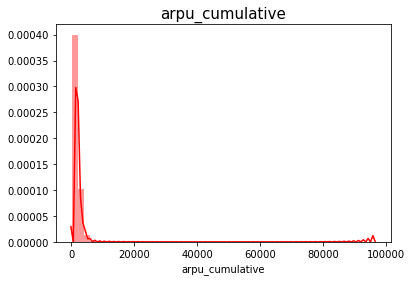

Distribution for- onnet_mou_cumulative


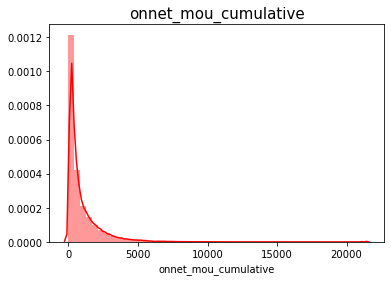

Distribution for- offnet_mou_cumulative


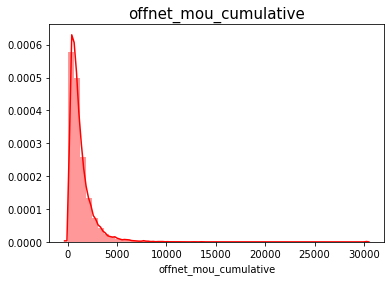

Distribution for- roam_ic_mou_cumulative


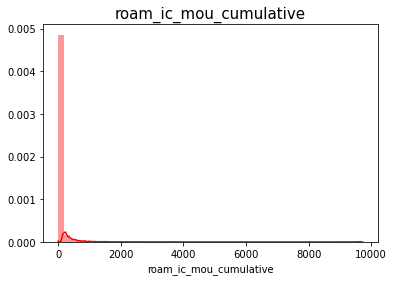

Distribution for- roam_og_mou_cumulative


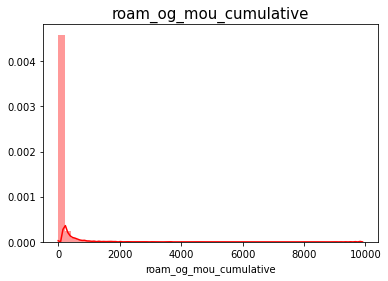

Distribution for- loc_og_t2t_mou_cumulative


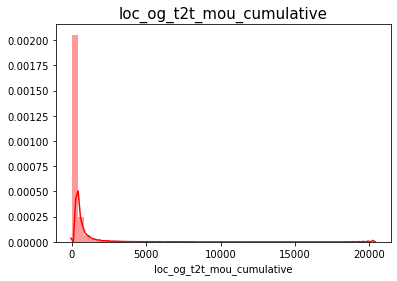

Distribution for- loc_og_t2m_mou_cumulative


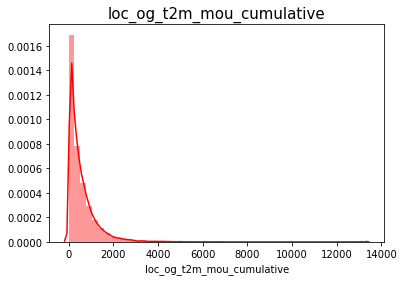

Distribution for- loc_og_t2f_mou_cumulative


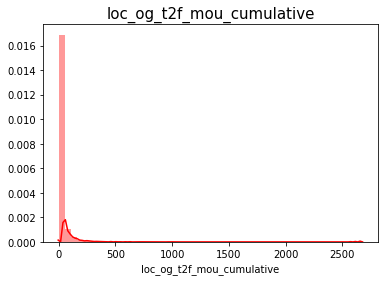

Distribution for- loc_og_t2c_mou_cumulative


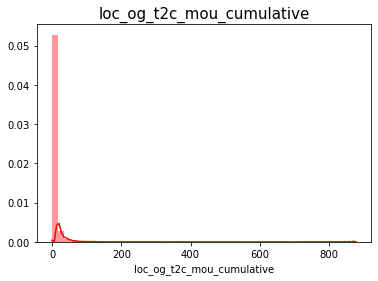

Distribution for- loc_og_mou_cumulative


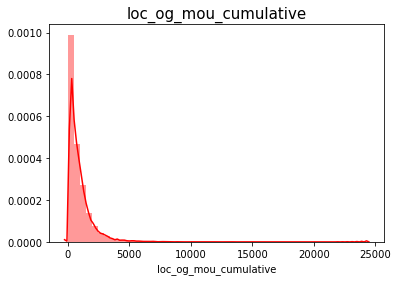

Distribution for- std_og_t2t_mou_cumulative


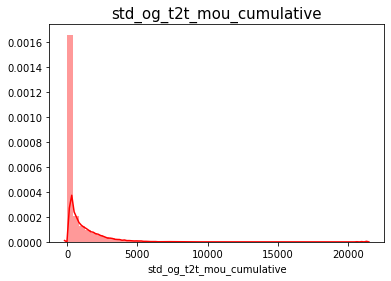

Distribution for- std_og_t2m_mou_cumulative


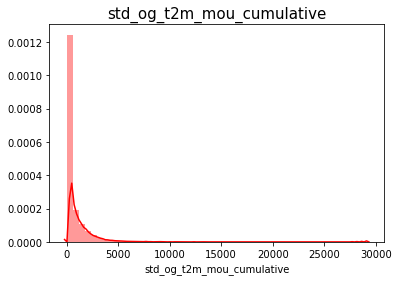

Distribution for- std_og_t2f_mou_cumulative


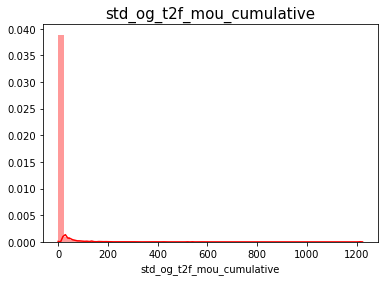

Distribution for- std_og_mou_cumulative


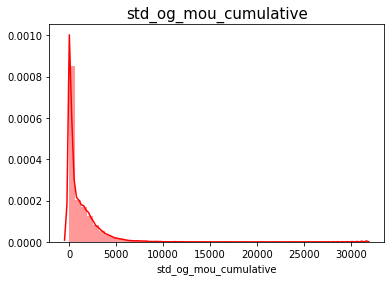

Distribution for- isd_og_mou_cumulative


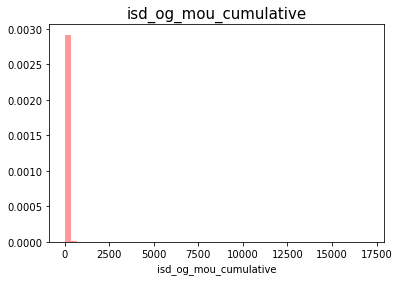

Distribution for- spl_og_mou_cumulative


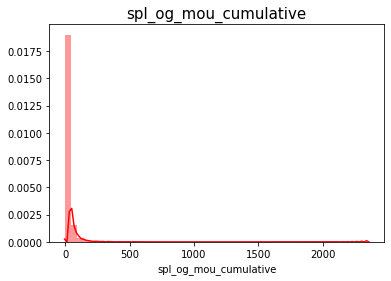

Distribution for- og_others_cumulative


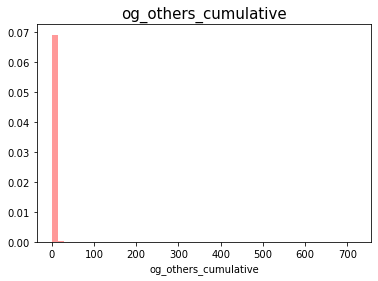

Distribution for- total_og_mou_cumulative


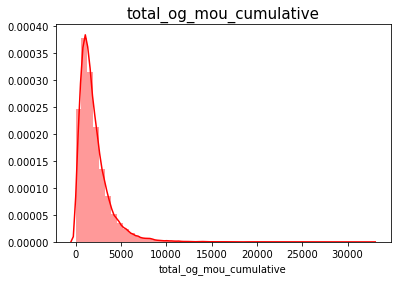

Distribution for- loc_ic_t2t_mou_cumulative


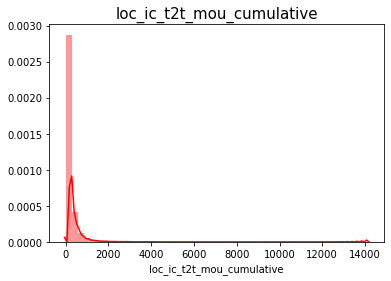

Distribution for- loc_ic_t2m_mou_cumulative


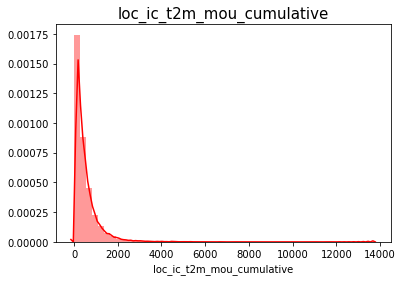

Distribution for- loc_ic_t2f_mou_cumulative


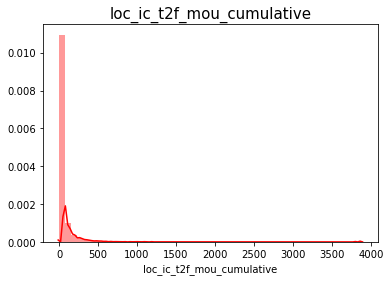

Distribution for- loc_ic_mou_cumulative


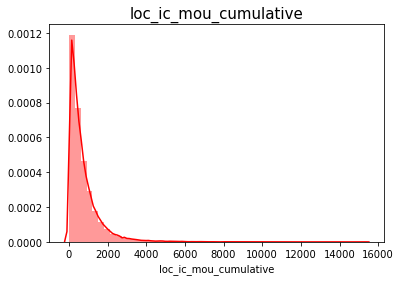

Distribution for- std_ic_t2t_mou_cumulative


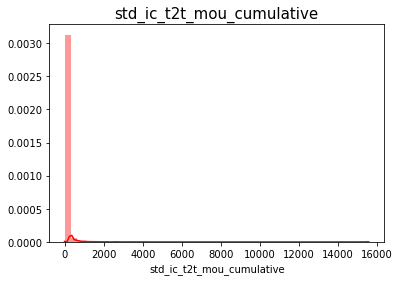

Distribution for- std_ic_t2m_mou_cumulative


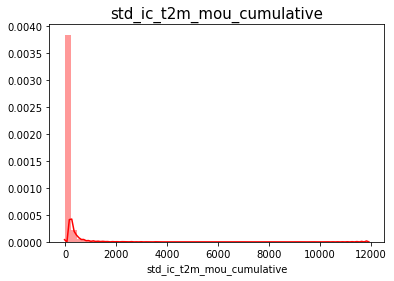

Distribution for- std_ic_t2f_mou_cumulative


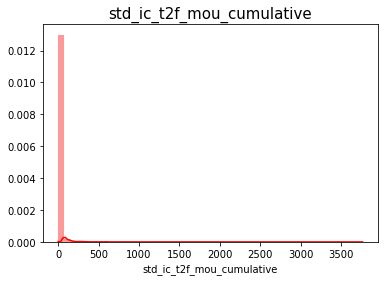

Distribution for- std_ic_mou_cumulative


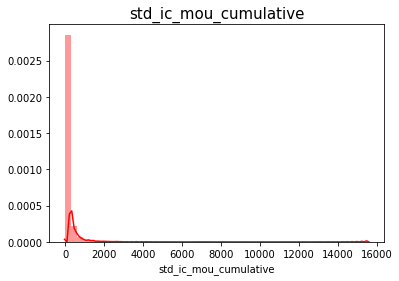

Distribution for- total_ic_mou_cumulative


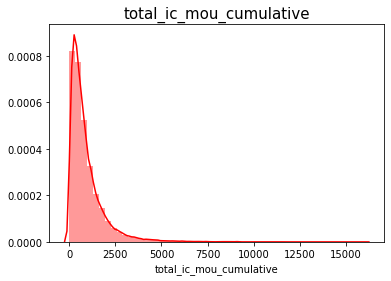

Distribution for- spl_ic_mou_cumulative


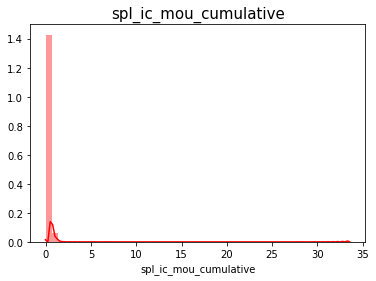

Distribution for- isd_ic_mou_cumulative


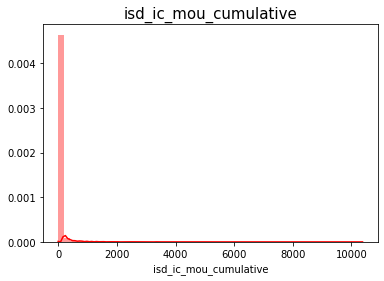

Distribution for- ic_others_cumulative


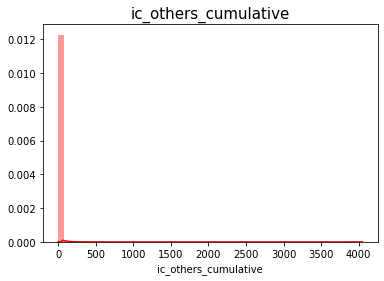

Distribution for- total_rech_num_cumulative


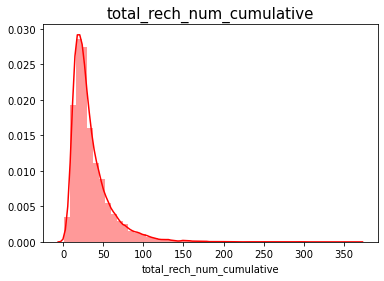

Distribution for- total_rech_amt_cumulative


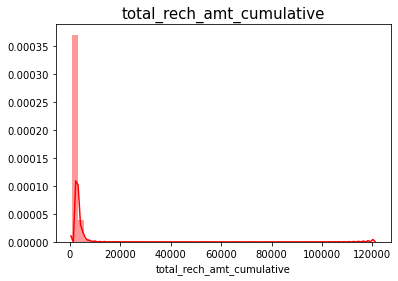

Distribution for- max_rech_amt_cumulative


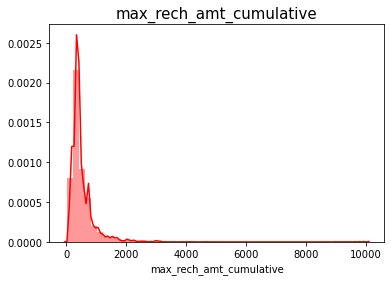

Distribution for- last_day_rch_amt_cumulative


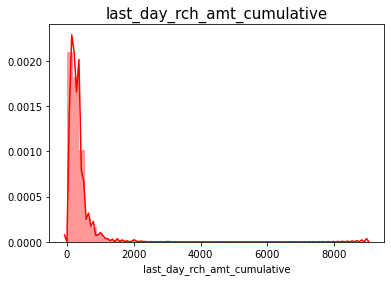

Distribution for- vol_2g_mb_cumulative


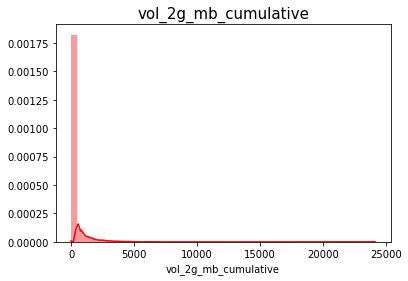

Distribution for- vol_3g_mb_cumulative


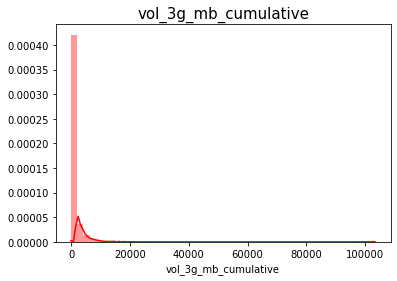

Distribution for- monthly_2g_cumulative


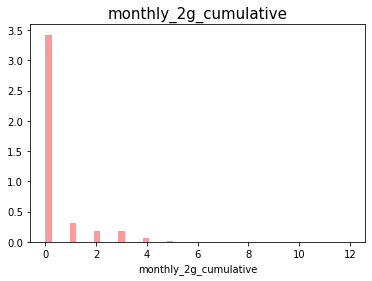

Distribution for- sachet_2g_cumulative


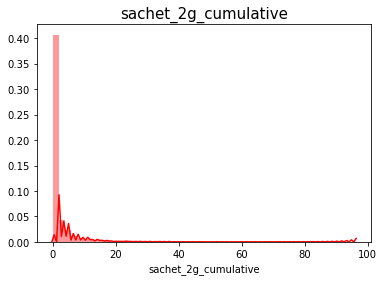

Distribution for- monthly_3g_cumulative


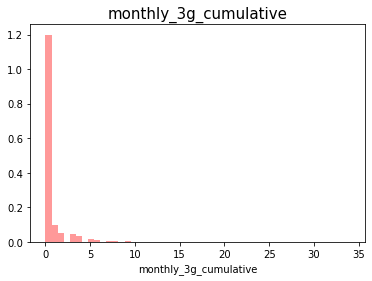

Distribution for- sachet_3g_cumulative


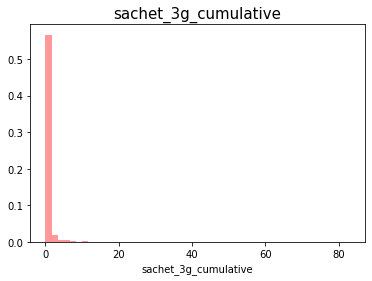

In [38]:
# plotiing distribution plot for cumulative numeric columns
for col in cumulative_cols:
    print("Distribution for-",col)
    #print(df[col].value_counts())
    plt.title(col,fontsize=15)
    sns.distplot(df[col],color='red')
    plt.show()

#### We observe high skewness in pretty much all columns. This is attributed because of heavy imbalance in the data.

Boxplot for arpu_cumulative


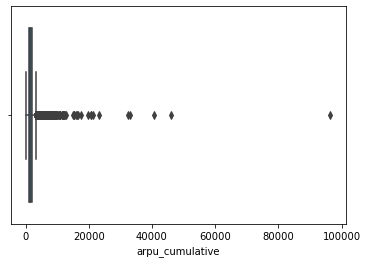

Boxplot for onnet_mou_cumulative


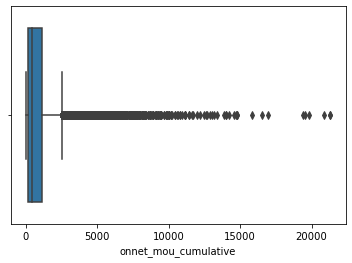

Boxplot for offnet_mou_cumulative


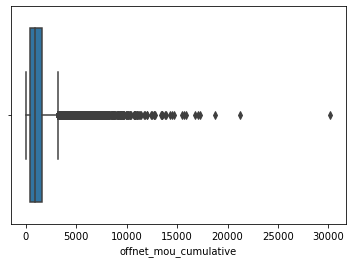

Boxplot for roam_ic_mou_cumulative


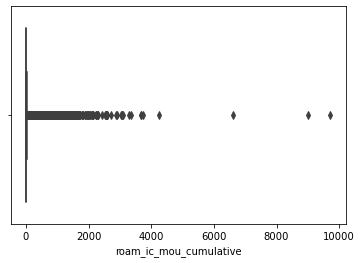

Boxplot for roam_og_mou_cumulative


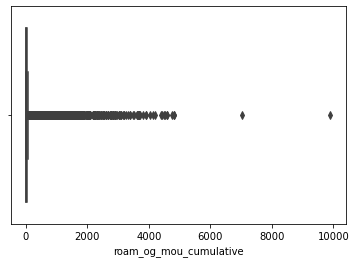

Boxplot for loc_og_t2t_mou_cumulative


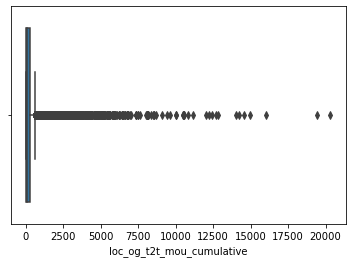

Boxplot for loc_og_t2m_mou_cumulative


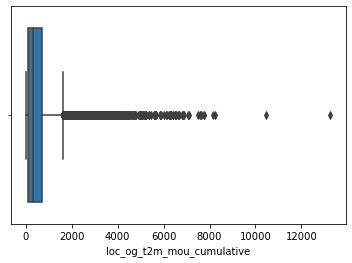

Boxplot for loc_og_t2f_mou_cumulative


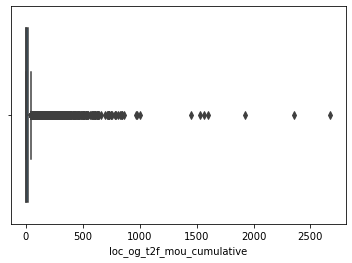

Boxplot for loc_og_t2c_mou_cumulative


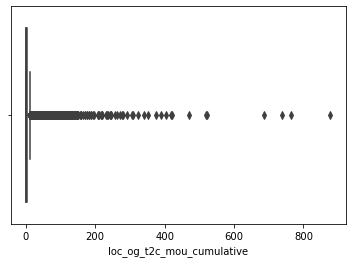

Boxplot for loc_og_mou_cumulative


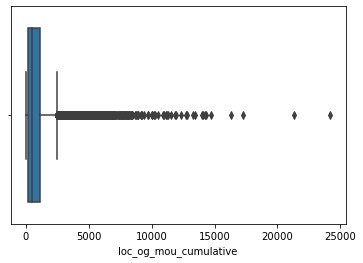

Boxplot for std_og_t2t_mou_cumulative


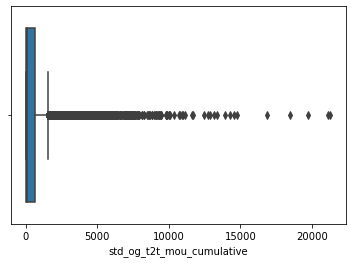

Boxplot for std_og_t2m_mou_cumulative


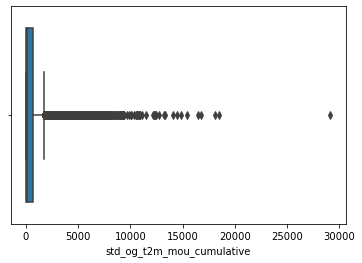

Boxplot for std_og_t2f_mou_cumulative


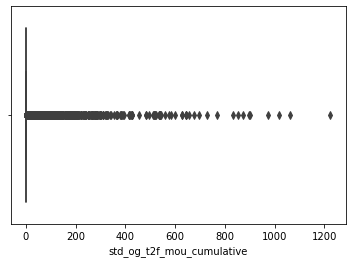

Boxplot for std_og_mou_cumulative


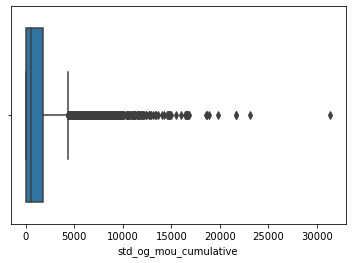

Boxplot for isd_og_mou_cumulative


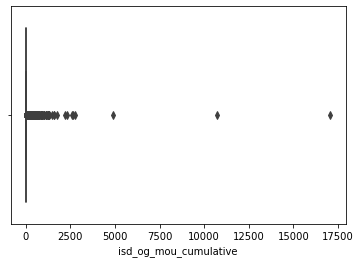

Boxplot for spl_og_mou_cumulative


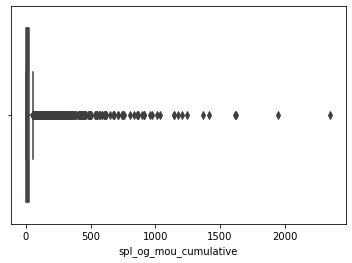

Boxplot for og_others_cumulative


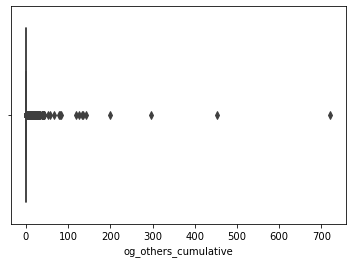

Boxplot for total_og_mou_cumulative


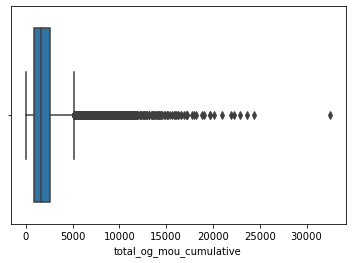

Boxplot for loc_ic_t2t_mou_cumulative


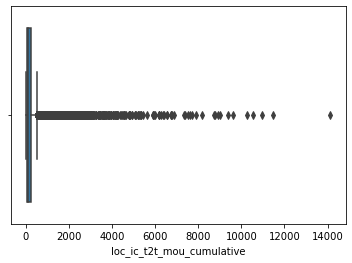

Boxplot for loc_ic_t2m_mou_cumulative


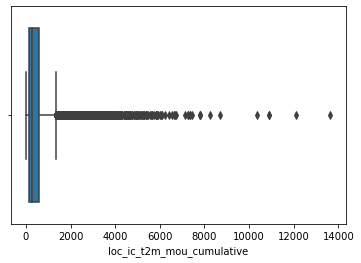

Boxplot for loc_ic_t2f_mou_cumulative


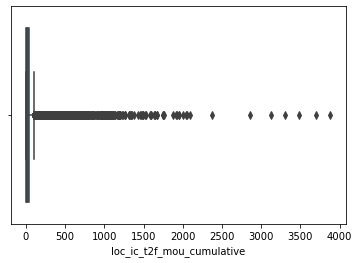

Boxplot for loc_ic_mou_cumulative


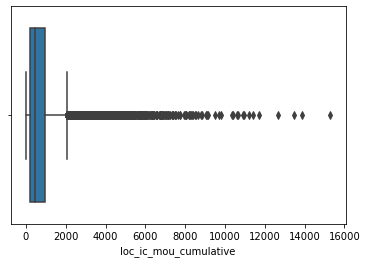

Boxplot for std_ic_t2t_mou_cumulative


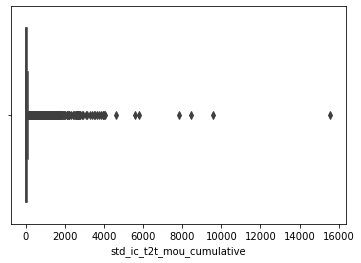

Boxplot for std_ic_t2m_mou_cumulative


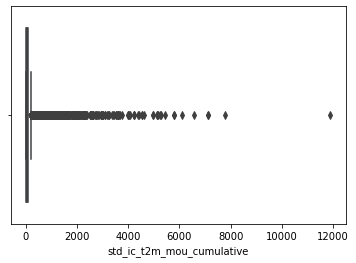

Boxplot for std_ic_t2f_mou_cumulative


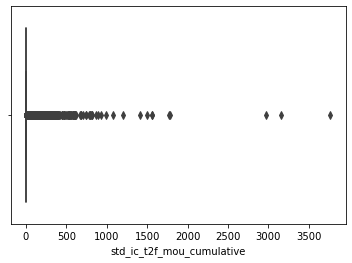

Boxplot for std_ic_mou_cumulative


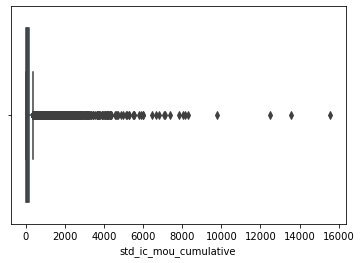

Boxplot for total_ic_mou_cumulative


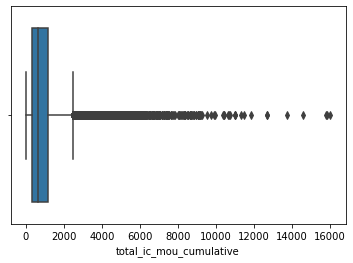

Boxplot for spl_ic_mou_cumulative


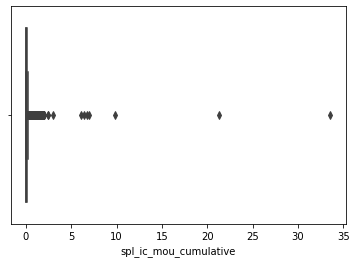

Boxplot for isd_ic_mou_cumulative


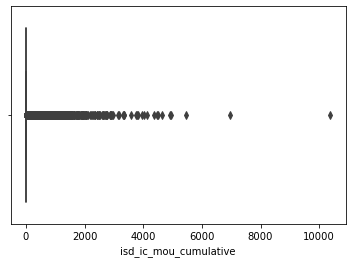

Boxplot for ic_others_cumulative


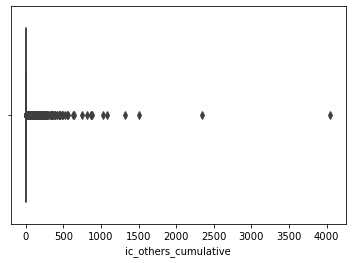

Boxplot for total_rech_num_cumulative


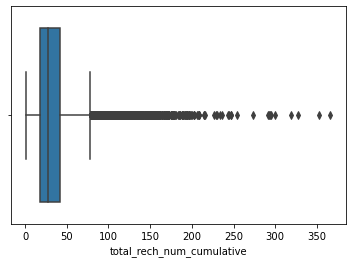

Boxplot for total_rech_amt_cumulative


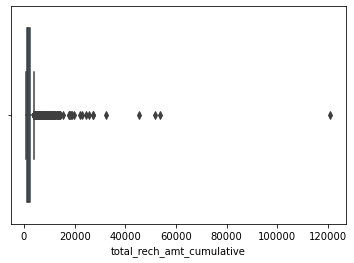

Boxplot for max_rech_amt_cumulative


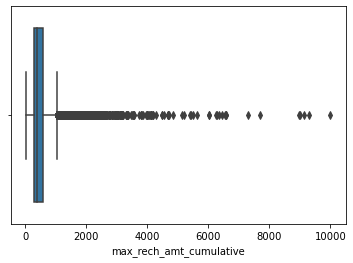

Boxplot for last_day_rch_amt_cumulative


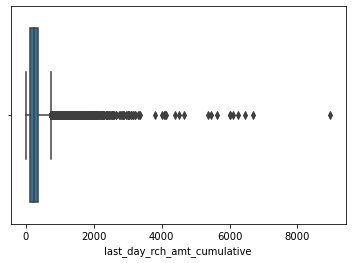

Boxplot for vol_2g_mb_cumulative


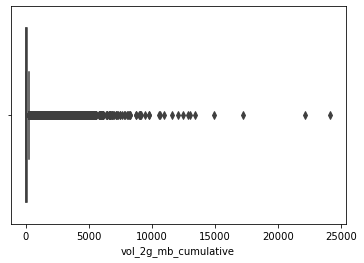

Boxplot for vol_3g_mb_cumulative


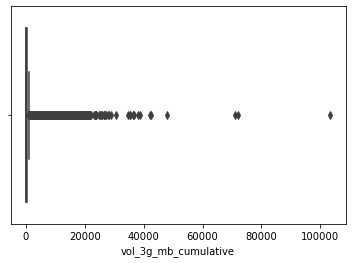

Boxplot for monthly_2g_cumulative


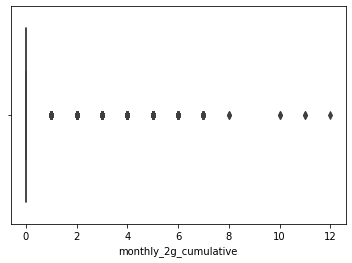

Boxplot for sachet_2g_cumulative


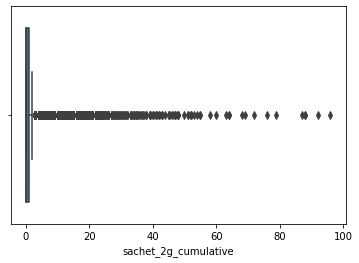

Boxplot for monthly_3g_cumulative


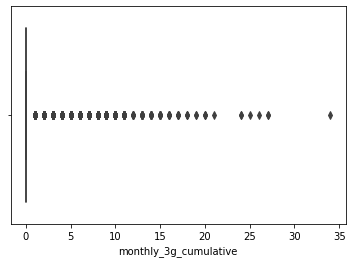

Boxplot for sachet_3g_cumulative


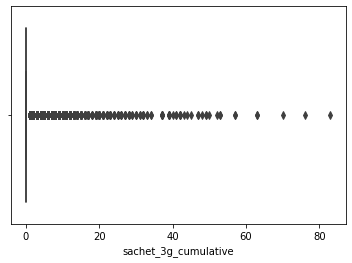

In [39]:
# plotting boxplot for numeric columns to spot outliers
for col in cumulative_cols:
    print('Boxplot for '+ col)
    sns.boxplot(df[col])
    plt.show();

#### The observation from the histogram can be reinstated here also in the box plots. We shall be doing soft capping to handle outliers

In [40]:
# Dropping the cumulative columns as they are not required anymore
df.drop(cumulative_cols,inplace=True,axis=1)

#### This shows that there are 6 columns that are not month related data. Lets explore those columns and the monthly data related columns separately.

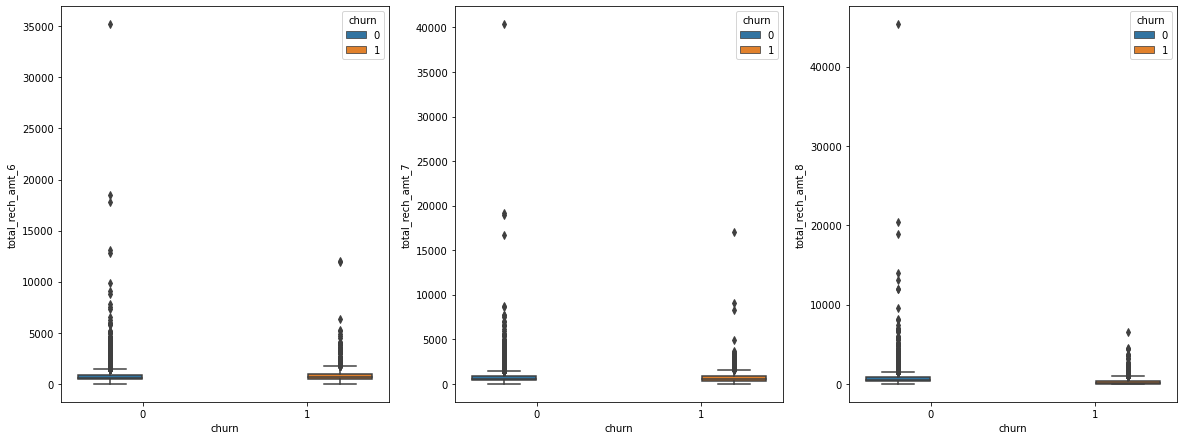

In [41]:
# Plotting total recharge amount of the 3 months side by side to observe a trend
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df,y='total_rech_amt_6',x='churn',hue='churn')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='total_rech_amt_7',x='churn',hue='churn')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='total_rech_amt_8',x='churn',hue='churn')
plt.show()

#### We can observe that the total recharge amout decreasing across the months 6,7,8 is an indication of churn. We can observe a significant decline in the 8th month which is the action phase for churned customers.

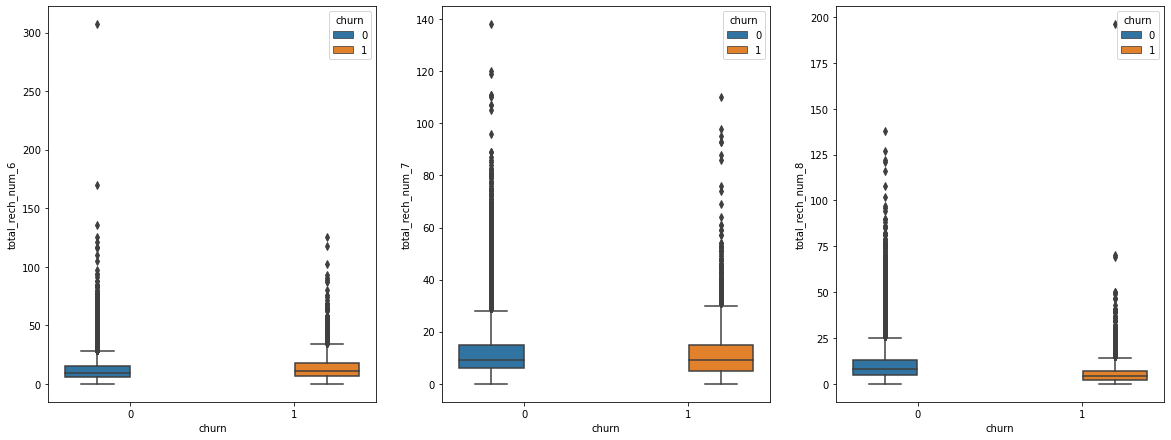

In [42]:
# Plotting total number recharge of the 3 months side by side to observe a trend
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df,y='total_rech_num_6',x='churn',hue='churn')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='total_rech_num_7',x='churn',hue='churn')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='total_rech_num_8',x='churn',hue='churn')
plt.show()

#### We can observe that the total number of recharge decreasing across the months 6,7,8 is an indication of churn

In [43]:
# Lets get the list of columns that are not monthly data with 6,7, 8 extensions
other_cols=[col for col in df.columns if col not in jun_cols+july_cols+aug_cols]
other_cols

['aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn']

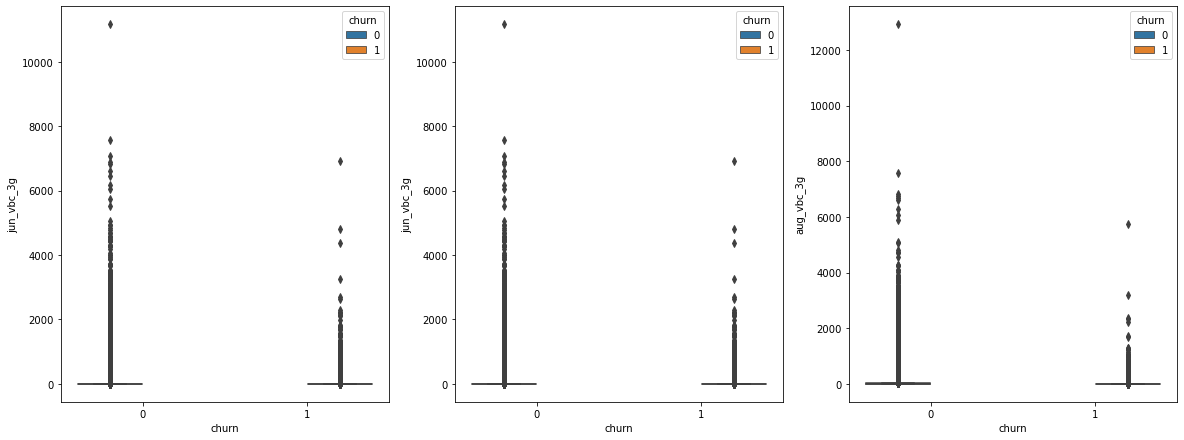

In [44]:
# Plotting for volume based cost:
    
plt.figure(figsize=(20,16))
plt.subplot(2,3,1)
sns.boxplot(data=df,y='jun_vbc_3g',x='churn',hue='churn')
plt.subplot(2,3,2)
sns.boxplot(data=df,y='jun_vbc_3g',x='churn',hue='churn')
plt.subplot(2,3,3)
sns.boxplot(data=df,y='aug_vbc_3g',x='churn',hue='churn')
plt.show()

#### Here we can only see a marginal decline

In [45]:
df[other_cols].describe()

,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,"30,011.000000","30,011.000000","30,011.000000","30,011.000000"
mean,"1,264.064776",129.439626,135.127102,121.360548
std,975.263117,390.478591,408.024394,389.726031
min,180.000000,0.000000,0.000000,0.000000
25%,480.000000,0.000000,0.000000,0.000000
50%,914.000000,0.000000,0.000000,0.000000
75%,"1,924.000000",1.600000,1.990000,0.000000
max,"4,321.000000","12,916.220000","9,165.600000","11,166.210000"


In [46]:
df[other_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   aon         30011 non-null  int64  
 1   aug_vbc_3g  30011 non-null  float64
 2   jul_vbc_3g  30011 non-null  float64
 3   jun_vbc_3g  30011 non-null  float64
 4   churn       30011 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.6+ MB


In [47]:
# Deriving all the numerical columns
numCols=list(df.select_dtypes(include=['float64','int64']).columns)
len(numCols)

124

In [48]:
df['aon'].describe([0.25,0.50,0.75,0.90,0.95,0.99])

count   30,011.000000
mean     1,264.064776
std        975.263117
min        180.000000
25%        480.000000
50%        914.000000
75%      1,924.000000
90%      2,846.000000
95%      3,179.000000
99%      3,651.000000
max      4,321.000000
Name: aon, dtype: float64

#### Finding age of users on the network

In [49]:
# creating categorical columns for age
df['aon_cat'] = pd.cut(df.aon,[0,365,730,1200,9999],labels=['<1','1-2','2-3','>3'])

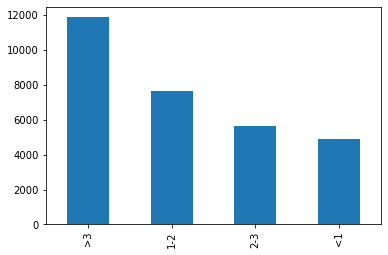

In [50]:
df['aon_cat'].value_counts().plot.bar()
plt.show()

In [51]:
df['Net_user'] = df.apply(lambda x: 'No' if x['vol_2g_mb_6']==0 and  x['vol_2g_mb_7']==0 and x['vol_2g_mb_8']==0 and x['vol_3g_mb_6']==0 and x['vol_3g_mb_7']==0 and x['vol_3g_mb_8']==0 else 'Yes',axis=1)

#### Finding number of users who use Internet

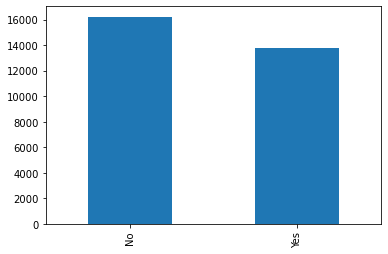

In [52]:
df['Net_user'].value_counts().plot.bar()
plt.show()

#### Finding no of users that have ISD calls

In [53]:
df['Int_calls'] = df.apply(lambda x: 'No' if x['isd_ic_mou_6']==0 and  x['isd_ic_mou_7']==0 and x['isd_ic_mou_8']==0 and x['isd_og_mou_6']==0 and x['isd_og_mou_7']==0 and x['isd_og_mou_8']==0 else 'Yes',axis=1)

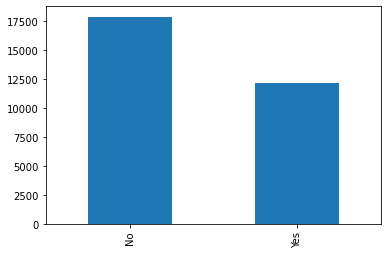

In [54]:
df['Int_calls'].value_counts().plot.bar()
plt.show()

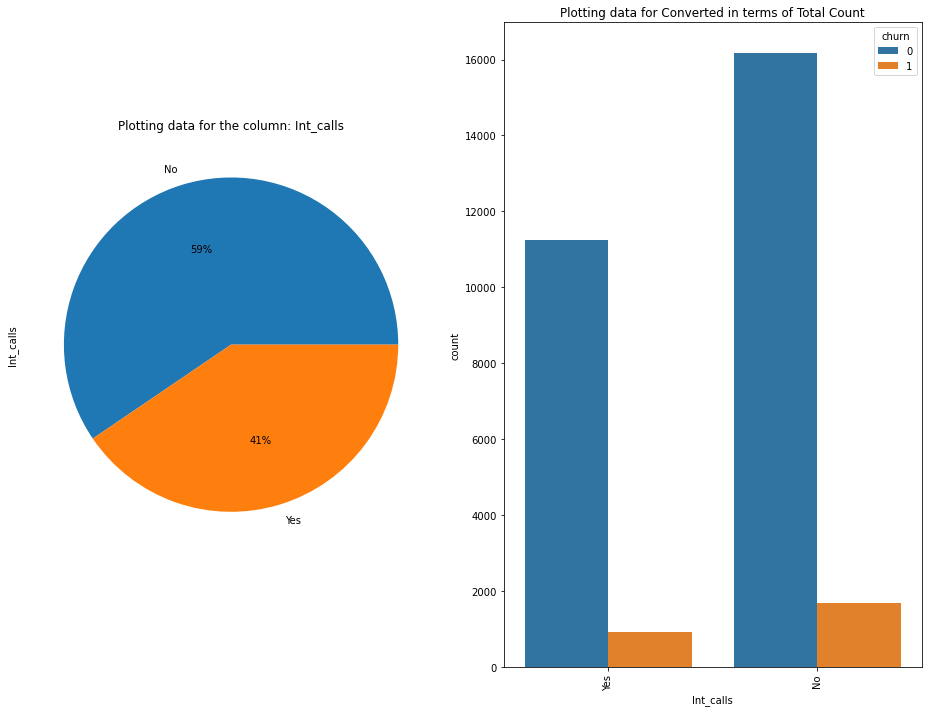

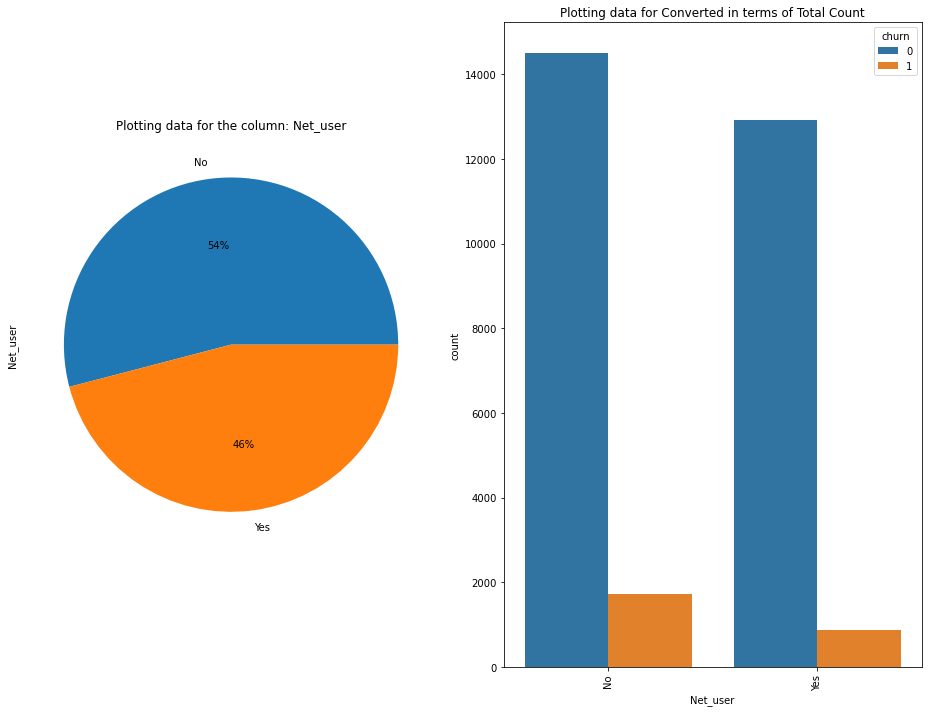

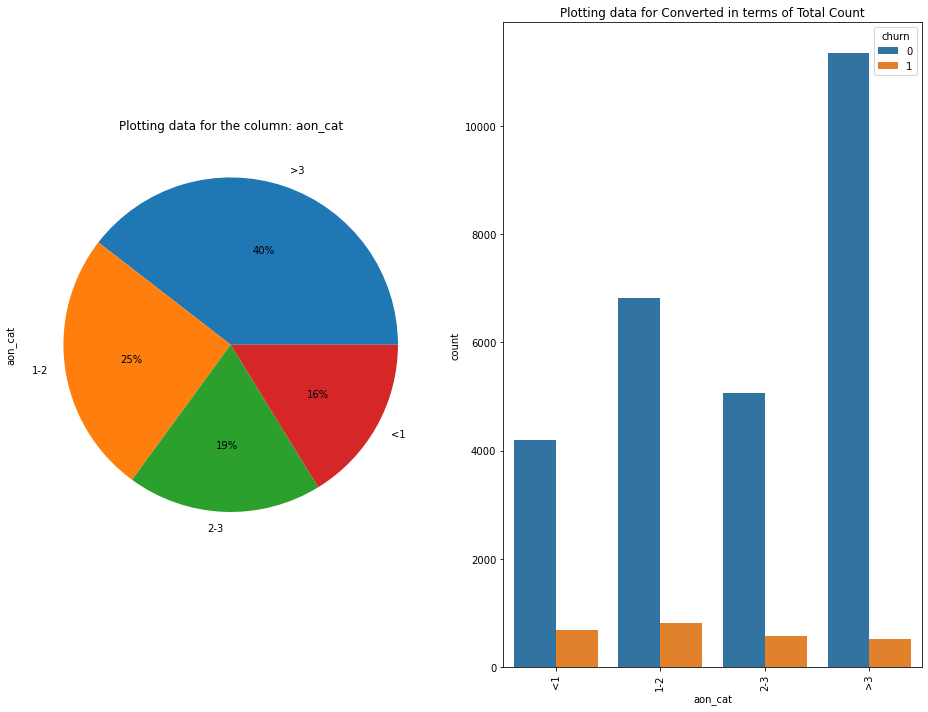

In [55]:
# Bi-variate analysis of the newly formed categorical columns
for col in ['Int_calls','Net_user','aon_cat']:
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(121)
    df[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ col)
    
    ax2 = plt.subplot(122)
    sns.countplot(x= col, hue = 'churn', data = df, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Converted in terms of Total Count')


    fig.tight_layout() 
    plt.show();

#### We observe that the highest churn is at 1-2 years, the network users have lower churn rate (hint to have more mobile data schemes). We also observe that internations callers have lower churn rates too

#### Let us now check the top correlations. We will remove columns with more than 80% collinearity

In [56]:
correlation_1 = df.corr().abs()
correlation_1 = correlation_1.unstack().sort_values(kind='quicksort',ascending=False)
correlation_1 = correlation_1.dropna()
correlation_1 = correlation_1[ correlation_1 != 1.0 ]
correlation_1.head(50)

total_rech_amt_8  arpu_8             0.953725
arpu_8            total_rech_amt_8   0.953725
isd_og_mou_8      isd_og_mou_7       0.941347
isd_og_mou_7      isd_og_mou_8       0.941347
total_rech_amt_6  arpu_6             0.941256
arpu_6            total_rech_amt_6   0.941256
total_rech_amt_7  arpu_7             0.937114
arpu_7            total_rech_amt_7   0.937114
isd_og_mou_8      isd_og_mou_6       0.916058
isd_og_mou_6      isd_og_mou_8       0.916058
                  isd_og_mou_7       0.914963
isd_og_mou_7      isd_og_mou_6       0.914963
total_ic_mou_6    loc_ic_mou_6       0.895624
loc_ic_mou_6      total_ic_mou_6     0.895624
loc_ic_mou_8      total_ic_mou_8     0.889933
total_ic_mou_8    loc_ic_mou_8       0.889933
loc_ic_mou_7      total_ic_mou_7     0.882860
total_ic_mou_7    loc_ic_mou_7       0.882860
onnet_mou_8       std_og_t2t_mou_8   0.857390
std_og_t2t_mou_8  onnet_mou_8        0.857390
loc_ic_t2m_mou_8  loc_ic_mou_8       0.853509
loc_ic_mou_8      loc_ic_t2m_mou_8

In [57]:
#Removing the columns with high collinearity
L=['arpu_8','total_rech_amt_6','total_rech_amt_7','total_ic_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_og_t2t_mou_8','std_ic_mou_8','std_og_t2t_mou_7','std_ic_t2m_mou_7','std_ic_t2m_mou_6','std_og_t2t_mou_6','aon','loc_og_mou_8','loc_ic_t2m_mou_8','loc_og_mou_6','loc_og_t2t_mou_7','total_og_mou_8']
df.drop(L,inplace=True,axis=1)

In [58]:
numCols=df.describe().columns
numCols

Index(['arpu_6', 'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g'],
      dtype='object', length=105)

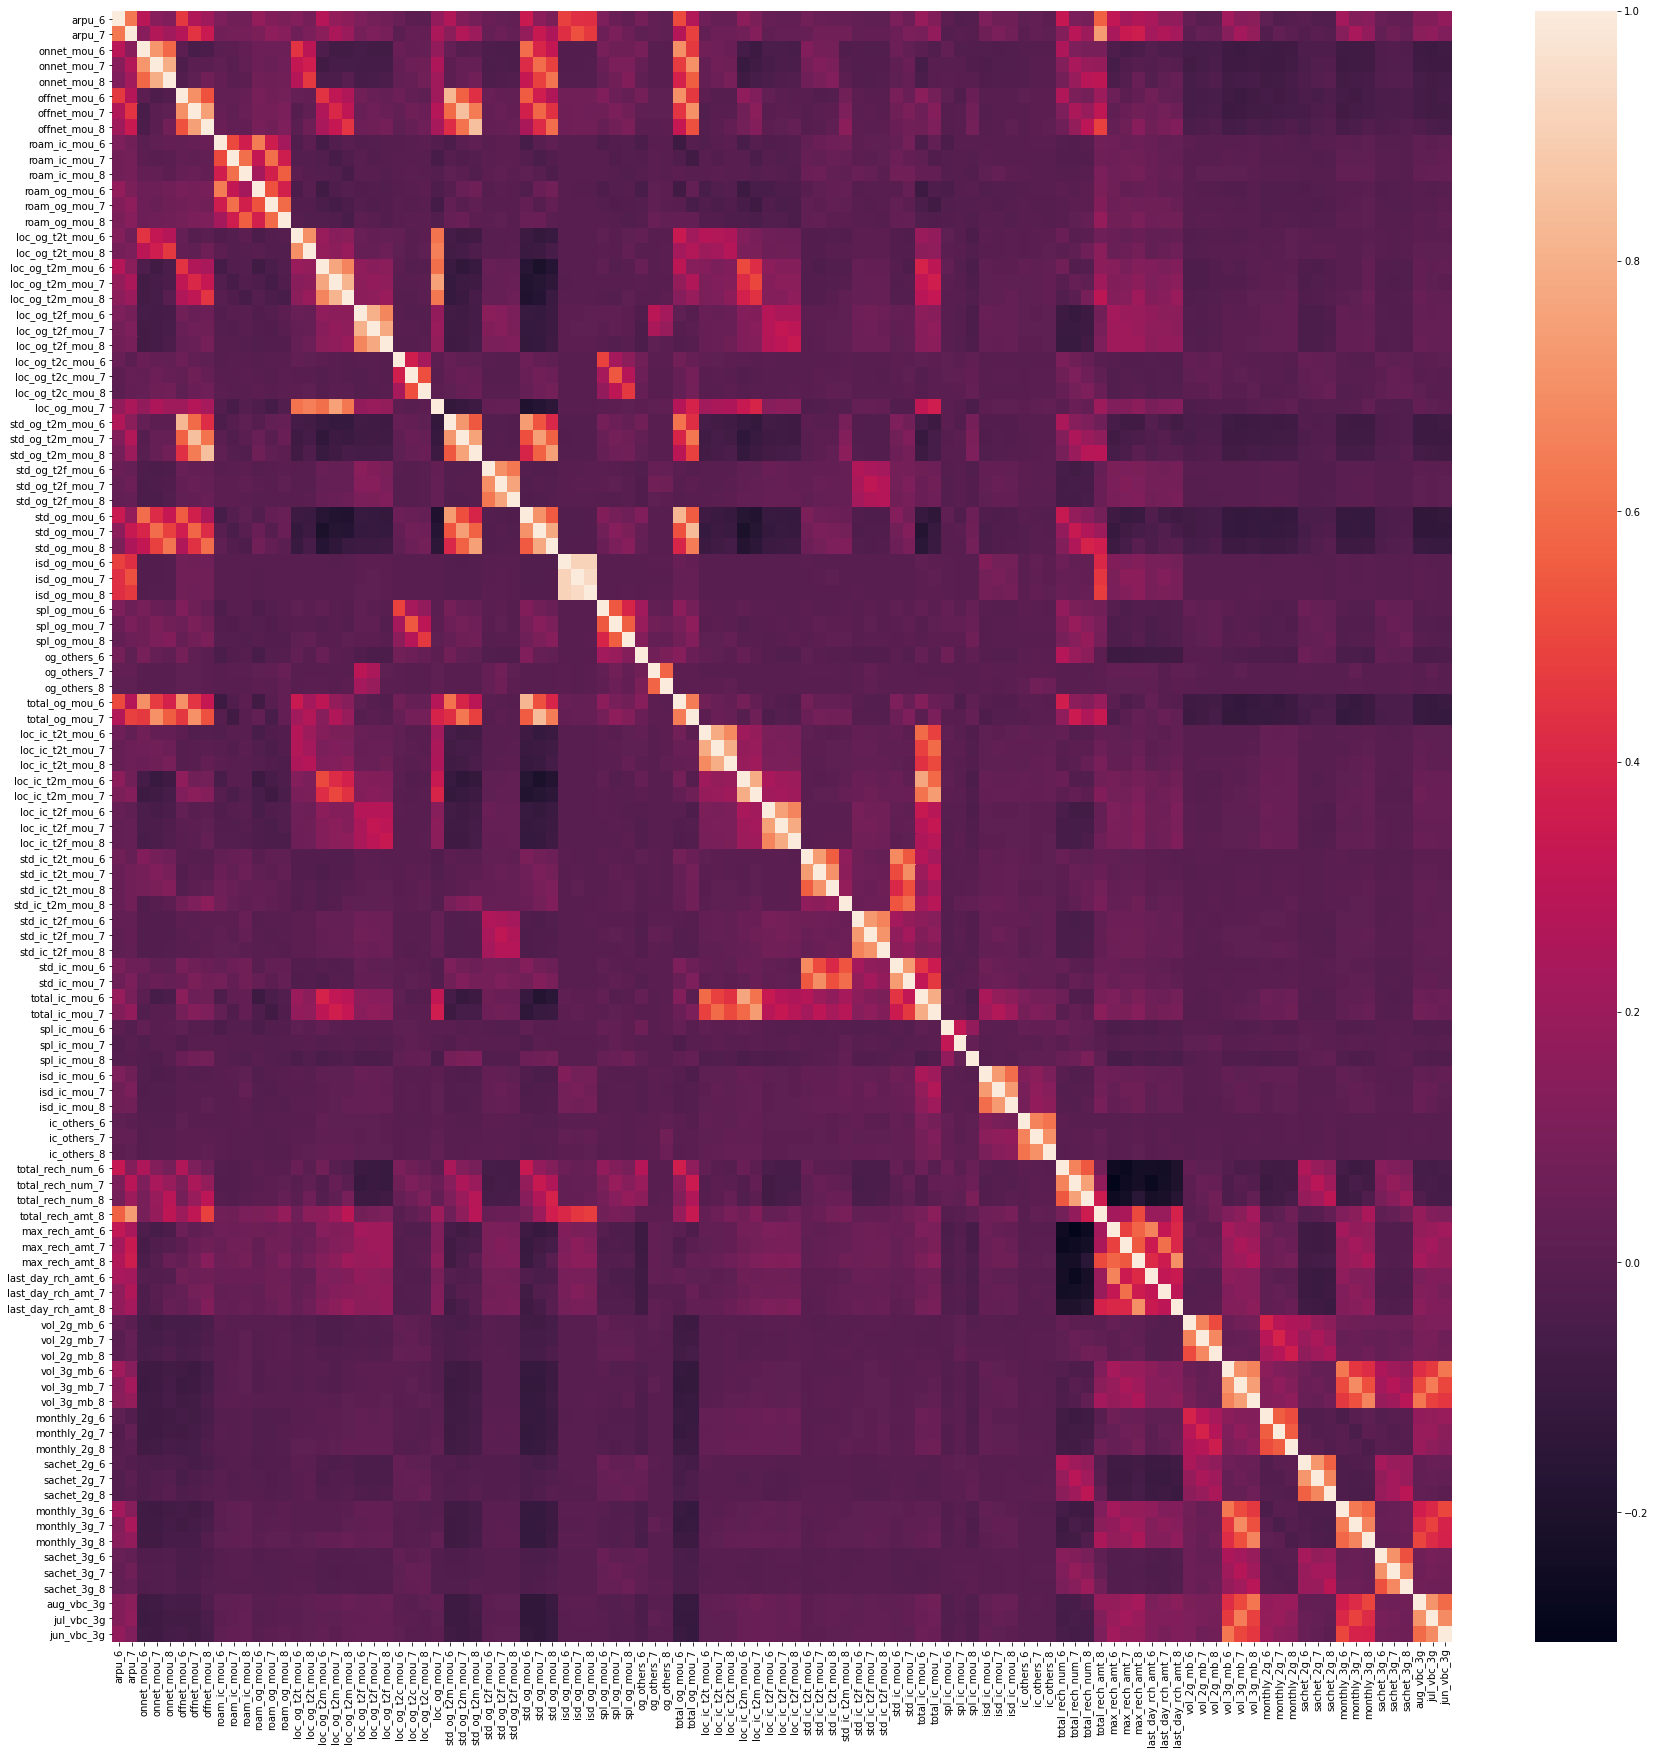

In [59]:
# Observation of heatmap

plt.figure(figsize=(30,30))
sns.heatmap(df[numCols].corr())
plt.show();

#### Capping the numerical columns

##### As we can see that mostly all numerical column are skewed hence we are applying soft capping on them

In [60]:
#Taking care of outliers by soft caping to 5 percentile and 99 percentile value
numCols = list(numCols)
#numCols.remove('aon')
for i in numCols :
    q1 = df[i].quantile(0.05)
    q4 = df[i].quantile(0.99)
    
    df[i][df[i]<=q1] = q1
    df[i][df[i]>=q4] = q4

In [61]:
df[numCols].describe()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,"30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000","30,011.000000"
mean,582.451380,584.259317,287.456559,295.139088,258.329317,410.846539,416.090683,365.086791,14.803628,10.634542,10.593967,25.564224,18.600768,17.576605,86.606237,78.666618,175.817174,176.500248,163.125580,6.283114,6.399307,5.889841,1.327933,1.538465,1.473665,276.217376,194.965241,204.888804,169.769835,1.492833,1.448338,1.276300,385.685507,405.525257,342.836661,0.792380,0.795421,0.554784,5.313965,6.621160,6.018014,0.628516,0.000000,0.000000,678.118914,699.509718,62.857814,63.834547,59.902913,154.334126,155.499366,14.120142,14.875322,13.262052,12.946679,13.645923,12.136009,26.339635,2.100741,2.204337,1.936273,46.104216,48.184984,301.050912,308.221285,0.064931,0.014259,0.025970,8.296861,9.049057,8.499376,0.714463,0.905952,0.749592,12.021825,11.822832,10.111026,600.722898,169.570924,173.485422,159

#### As we can observe that after soft capping, the two columns og_others_7 and og_others_8 have all zeroes. We shall drop these columns also.

In [62]:
df.drop(['og_others_7','og_others_8'],inplace=True, axis=1)

In [63]:
# The data in the columns monthly and sachet service schemes columns are whole numbers
# We can convert them to categorical columns
catCol= [i for i in df.columns if ('monthly' in i) or ('sachet' in i)]
catCol

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

In [64]:
for col in catCol:
    df[col]=df[col].astype('object')


Distribution for  monthly_2g_6


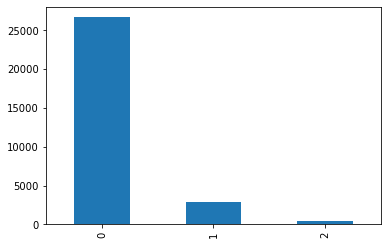

Distribution for  monthly_2g_7


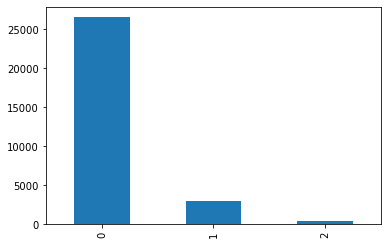

Distribution for  monthly_2g_8


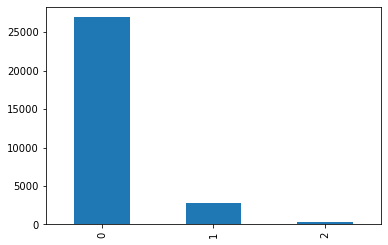

Distribution for  sachet_2g_6


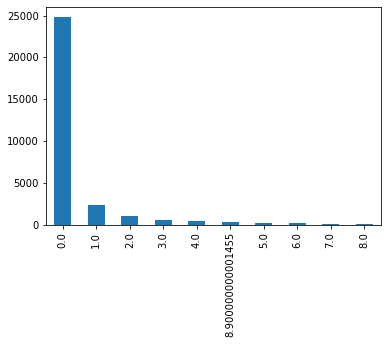

Distribution for  sachet_2g_7


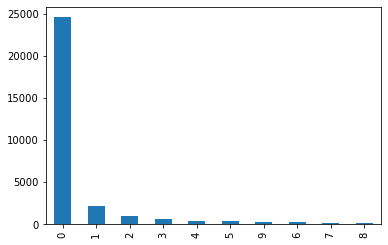

Distribution for  sachet_2g_8


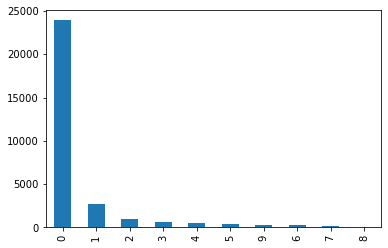

Distribution for  monthly_3g_6


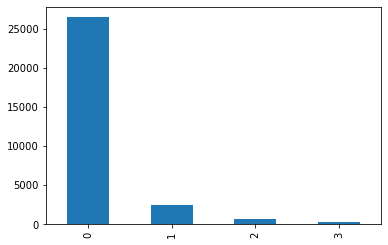

Distribution for  monthly_3g_7


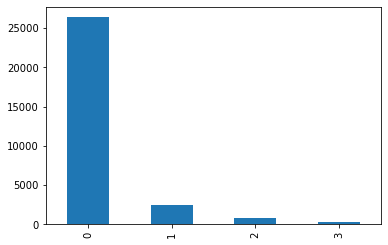

Distribution for  monthly_3g_8


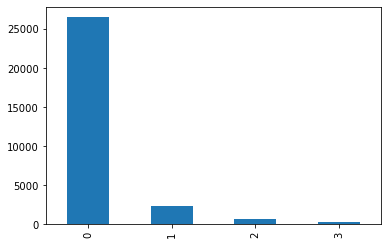

Distribution for  sachet_3g_6


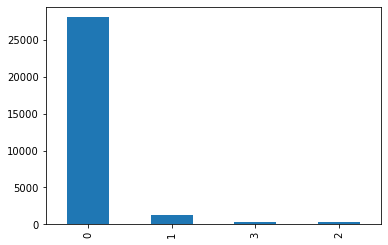

Distribution for  sachet_3g_7


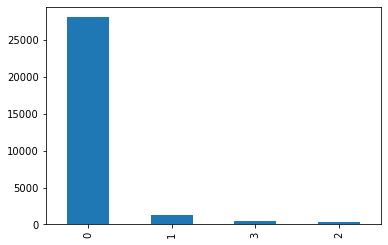

Distribution for  sachet_3g_8


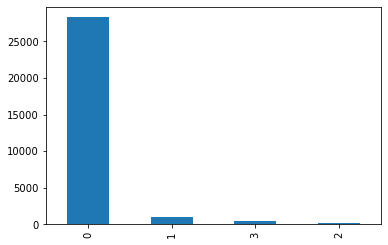

In [65]:
for col in catCol:
    print('Distribution for ',col)
    df[col].value_counts().plot.bar()
    plt.show();
    

In [66]:
# Checking the dimensions of dataframe again
df.shape

(30011, 107)

### Data Preparation<a id='dataPrep'></a>
Go to [Index](#index).

##### Getting a list of categorical columns

In [67]:
catCol= [i for i in df.columns if ('monthly' in i) or ('sachet' in i)]

In [68]:
for col in catCol:
    df[col]=df[col].astype('object')

In [69]:
tmp =['churn','aon_cat']
for col in tmp:
    df[col] = df[col].astype('object')

#### Converting categorical columns into Numerical columns using Dummy

##### For the monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8 we are directly converting them into numerical column as they categorical values in integers

##### For rest of columns we are using pandas.dummy and map function to convert into numerical columns

In [70]:
numCols=list(df.select_dtypes(include=['float64','int64']).columns)
catCols=list(df.select_dtypes(include=['object']).columns)

In [71]:
list4 = ['Net_user','Int_calls','aon_cat','churn']
for col in catCols:
    if col not in list4:
        df[col] = df[col].astype('int64')

In [72]:
varlist = ['Net_user','Int_calls']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [73]:
dummy = pd.get_dummies(df['aon_cat'], drop_first=True,prefix=str('aon_cat'))
df.drop('aon_cat',inplace=True,axis=1)

#Adding the results to the master dataframe
df = pd.concat([df,dummy], axis=1)

#### We are splitting into two sets train and test, where we are having 70% values as train and rest 30% as test

In [74]:
# target variable
Y = df['churn']

X = df
X.drop('churn',inplace=True,axis=1)
X.shape

(30011, 108)

In [75]:
# converting target variable into integer
Y = Y.astype('int')

In [76]:
# spliting test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
X_test.shape

(9004, 108)

##### Dealing with Data Imbalance

##### As we can see there is a lot of data imbalance in the data, so we are using the Synthetic Minority Over-sampling Technique so create some dummy data to handle imbalance.

##### Smote creates dummy data for the lower category and thus balances training data. It is better than other techniques as they do not create duplicates or suffer data loss

In [78]:
# initially
y_train.value_counts(normalize=True)

0   0.913219
1   0.086781
Name: churn, dtype: float64

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [84]:
X_train.shape

(38368, 108)

In [85]:
# after applying SMOTE
y_train.value_counts(normalize=True)

1   0.500000
0   0.500000
Name: churn, dtype: float64

#### Hence data Imbalance is solved for the training data

##### In the above displots we can clearly see that the data is highly skewed and may not be ideal for analysis. In order to correct the data for our analysis and draw meaningful insights, we scale the data so it gets converted to normalized variable that are ideal for analysis.

##### In this we are using Standard Scaler

#### Feature Scaling

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Net_user,Int_calls,aon_cat_2-3,aon_cat_<1,aon_cat_>3
0,331.304000,480.315000,336.330000,564.780000,424.110000,154.940000,71.080000,88.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,8.530000,1.660000,1.930000,1.610000,0.000000,0.000000,0.000000,9.060000,0.000000,0.000000,5.190000,124.210000,61.890000,86.530000,0.000000,0.000000,0.000000,459.530000,623.410000,502.110000,0.000000,0.000000,0.000000,32.230000,7.250000,2.930000,0.000000,494.440000,635.860000,2.130000,7.410000,1.880000,9.280000,21.310000,0.000000,0.000000,0.000000,71.180000,65.580000,62.440000,108.030000,0.000000,0.000000,0.000000,112.640000,125.940000,124.210000,154.680000,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,24,25,450.000000,36,70,50,0,20,10,0.000000,211.200000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,1,0,0,1,0
1,320.013000,508.681000,110.080000,27.540000,131.030000,220.860000,117.840000,168.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.080000,131.030000,192.110000,84.440000,110.080000,22.740000,30.410000,55.380000,0.000000,0.000000,0.000000,142.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.980000,3.530000,0.000000,330.940000,145.390000,19.990000,11.640000,37.890000,481.340000,235.290000,94.660000,38.530000,167.860000,3.750000,2.930000,0.000000,0.000000,0.000000,0.980000,0.400000,3.750000,3.910000,607.780000,301.910000,0.000000,0.000000,0.000000,8.010000,12.510000,10.940000,0.000000,0.000000,0.000000,5,7,3,458.000000,110,198,198,110,110,198,0.000000,8.850000,51.460000,0.000000,91.600000,235.690000,0,1,1,0,0,0,0,0,0,0,0,0,170.160000,67.210000,48.780000,1,1,1,0,0
2,289.191000,802.774000,26.190000,83.340000,84.730000,206.610000,538.990000,411.430000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.190000,84.730000,202.360000,521.280000,409.480000,4.250000,7.530000,1.560000,0.000000,0.000000,0.000000,612.160000,0.000000,10.180000,0.380000,0.000000,0.000000,0.000000,0.000000,10.180000,0.380000,0.810000,11.780000,0.790000,0.000000,0.000000,0.000000,0.000000,233.630000,634.130000,29.460000,55.410000,43.340000,106.990000,269.230000,1.780000,4.860000,1.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,581.740000,"1,244.080000",0.000000,0.000000,0.000000,239.600000,240.125000,249.888000,0.000000,0.000000,0.000000,12,16,15,647.000000,36,120,50,30,120,50,0.000000,0

In [88]:
# train
scaler = StandardScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_train.head()

,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_7,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,total_ic_mou_6,total_ic_mou_7,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,Net_user,Int_calls,aon_cat_2-3,aon_cat_<1,aon_cat_>3
0,-0.813483,-0.249168,0.015462,0.638652,0.648459,-0.612768,-0.730428,-0.473622,-0.301809,-0.305177,-0.322489,-0.326655,-0.346616,-0.352141,-0.489319,-0.352983,-0.740355,-0.722610,-0.591015,-0.386509,-0.378548,-0.336897,2.158310,-0.373648,-0.311963,-0.721532,-0.303002,-0.411222,-0.138834,-0.231480,-0.225908,-0.194023,-0.063810,0.281646,0.496533,-0.191511,-0.181154,-0.146910,2.444065,0.051426,-0.152534,-0.438827,-0.381996,-0.066563,-0.589837,-0.496308,-0.465113,-0.714294,-0.625066,-0.409435,-0.396864,-0.357254,1.944834,1.755896,2.142156,1.957519,-0.265878,-0.253951,-0.227519,0.852403,1.027829,-0.467370,-0.316107,0.627152,-0.208565,-0.202718,-0.278194,-0.273816,-0.224017,-0.269005,-0.260740,-0.221297,0.705915,1.457337,2.183667,0.026692,-0.833146,-0.582852,-0.501043,-0.917281,-0.642837,-0.529136,-0.320598,0.843313,-0.254105,-0.344844,-0.338973,-0.296757,0,0,0,0,1,0,0,0,0,0,0,0,-0.303044,-0.325153,-0.331260,1,0,0,1,0
1,-0.846494,-0.164234,-0.483180,-0.623536,-0.167763,-0.472716,-0.627516,-0.252509,-0.301809,-0.305177,-0.322489,-0.326655,-0.346616,-0.352141,0.259170,0.707647,0.229504,-0.272995,0.034995,1.475089,2.171588,4.607484,-0.369671,-0.373648,-0.311963,-0.238352,-0.596533,-0.562181,-0.437073,-0.231480,-0.225908,-0.194023,-0.786355,-0.736992,-0.533332,-0.191511,-0.181154,-0.146910,0.038749,-0.290845,-0.094948,-0.438827,-0.626058,-0.818620,-0.384465,-0.446793,-0.009593,2.013245,0.701161,3.276696,1.035884,6.952751,-0.320185,-0.323913,-0.332281,-0.390623,-0.265878,-0.100973,-0.154379,-0.515887,-0.472217,1.167793,0.187179,-0.469483,-0.208565,-0.202718,-0.005825,0.152667,0.192180,-0.269005,-0.260740,-0.221297,-0.905131,-0.548032,-0.624457,0.044324,-0.338391,0.249906,0.540138,0.147327,0.230144,1.374517,-0.320598,-0.246707,0.077132,-0.344844,-0.185981,0.141119,0,1,1,0,0,0,0,0,0,0,0,0,0.362446,-0.097208,-0.151259,1,1,1,0,0
2,-0.936606,0.716343,-0.668068,-0.492439,-0.296708,-0.502991,0.299370,0.410530,-0.301809,-0.305177,-0.322489,-0.326655,-0.346616,-0.352141,-0.316522,0.306772,0.281702,2.107439,1.762916,-0.038585,0.252906,-0.197619,-0.369671,-0.373648,-0.311963,1.415735,-0.596533,-0.537350,-0.435763,-0.231480,-0.225908,-0.194023,-0.786355,-0.720358,-0.532552,-0.036395,2.362123,0.101051,-0.511456,-0.529713,-0.433744,-0.438827,-0.771316,-0.069216,-0.275569,0.065569,0.059348,-0.149730,0.911518,-0.340121,-0.216144,-0.301512,-0.446150,-0.421181,-0.332281,-0.390623,-0.265878,-0.253951,-0.227519,-0.512746,-0.520281,1.079740,3.407860,

In [89]:
# test
X_test[numCols] = scaler.transform(X_test[numCols])

### Model Building <a id='modelBuilding'></a>
Go to [Index](#index).

#### Building a Logistic Regression model to understand which variables are important in calculating whether the customer will churn or not 

#### Since we have a lot of variables involved initially so we will use RFE  ( Recursive Feature Elimination ) to find the optimal number of features to build our model

#### We are also using the Grid Search Cross Validation to find tune our RFE model using different training and validation sets

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 108,4))}]


# step-3: perform grid search

lm = LogisticRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

##### After applying Grid Search CV we got the optimal number of features as 44.

##### Since RFE coarse tunes our model , hence to manual tune it for better results we are using Stats Model , in which we are removing variables on basis of p-values and VIF ( Variance Inflation Factor)

In [91]:
logreg = LogisticRegression()
rfe = RFE(logreg, 44)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [92]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', False, 17),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 53),
 ('roam_ic_mou_7', False, 51),
 ('roam_ic_mou_8', False, 61),
 ('roam_og_mou_6', False, 25),
 ('roam_og_mou_7', False, 52),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 11),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 24),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 36),
 ('loc_og_t2f_mou_7', False, 14),
 ('loc_og_t2f_mou_8', False, 15),
 ('loc_og_t2c_mou_6', False, 45),
 ('loc_og_t2c_mou_7', False, 46),
 ('loc_og_t2c_mou_8', False, 27),
 ('loc_og_mou_7', False, 10),
 ('std_og_t2m_mou_6', True, 1),
 ('std_og_t2m_mou_7', False, 3),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_6', False, 55),
 ('std_og_t2f_mou_7', False, 37),
 ('std_og_t2f_mou_8', False, 50),
 ('std_o

In [93]:
X_train_rfe = X_train.copy()

In [94]:
col = X_train.columns[rfe.support_]

In [95]:
# list of columns excluded from our model
X_train_rfe.columns[~rfe.support_]

Index(['offnet_mou_7', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'loc_og_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'total_og_mou_6',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'total_ic_mou_6',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8',
       'total_rech_num_6', 'total_rech_nu

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
X_train_sm = sm.add_constant(X_train_rfe[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38323
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11662.
Date:                Tue, 01 Jun 2021   Deviance:                       23324.
Time:                        00:07:28   Pearson chi2:                 2.23e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8231      0.034     53.792      0.000       1.757       1.890
arpu_6                 0.2648      0.034      7.719      0.000       0.198       0.332
arpu_7                 0.3621      0.036      9.999      0.000       0.291       0.433
onnet_mou_6            0.2369      0.059      4.024      0.000       0.121       0.352
onnet_mou_7           -0.2834      0.046     -6.224      0.000      -0.373      -0.194
onnet_mou_8           -1.1212      0.096    -11.668      0.000      -1.310      -0.933
offnet_mou_6          -0.3591      0.068     -5.291      0.000      -0.492      -0.226
offnet_mou_8          -0.7584      0.123     -6.170      0.000      -0.999      -0.518
roam_og_mou_8          0.3988      0.028     14.137      0.000       0.343       0.454
loc_og_t2t_mou_8      -0.2259      0.055     -4.100      0.000      -0.334      -0.118
loc_og_t2m_mou_7      -0.2513      0.053     -4.755      0.000      -0.355      -0.148
loc_og_t2m_mou_8      -0.3953      0.074     -5.351      0.000      -0.540      -0.251
std_og_t2m_mou_6       0.5264      0.086      6.106      0.000       0.357       0.695
std_og_t2m_mou_8      -0.5119      0.111     -4.608      0.000      -0.730      -0.294
std_og_mou_6          -0.3548      0.081     -4.353      0.000      -0.515      -0.195
std_og_mou_7          -0.8437      0.116     -7.288      0.000      -1.071      -0.617
std_og_mou_8           1.0255      0.121      8.463      0.000       0.788       1.263
total_og_mou_7         1.1908      0.125      9.534      0.000       0.946       1.436
loc_ic_t2t_mou_8      -0.4392      0.034    -12.814      0.000      -0.506      -0.372
loc_ic_t2m_mou_6       0.2666      0.035      7.538      0.000       0.197       0.336
loc_ic_t2m_mou_7      -0.3017      0.047     -6.414      0.000      -0.394      -0.209
loc_ic_t2f_mou_8      -0.2843      0.029     -9.775      0.000      -0.341      -0.227
std_ic_t2m_mou_8      -0.2963      0.024    -12.548      0.000      -0.343      -0.250
total_ic_mou_7         0.2636      0.041      6.432      0.000       0.183       0.344
spl_ic_mou_8          -0.4028      0.024    -16.867      0.000      -0.450      -0.356
total_rech_num_8      -0.5796      0.026    -22.461      0.000      -0.630      -0.529
total_rech_amt_8       0.2176      0.047      4.615      0.000       0.125       0.310
last_day_rch_amt_8    -0.6540      0.026    -25.568      0.000      -0.704      -0.604
vol_2g_mb_6            0.3216      0.023     13.727      0.000       0.276       0.368
vol_3g_mb_6            0.5547      0.038     14.470      0.000       0.480       0.630
vol_3g_mb_7            0.2312      0.037      6.275      0.000       0.159       0.303
monthly_2g_6          -1.6827      0.113    -14.943      0.000      -1.903      -1.462
monthly_2g_7          -1.0040      0.1

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,std_og_mou_8,41.140000
6,offnet_mou_8,40.450000
12,std_og_t2m_mou_8,35.540000
16,total_og_mou_7,33.760000
14,std_og_mou_7,29.350000
4,onnet_mou_8,24.020000
11,std_og_t2m_mou_6,19.330000
13,std_og_mou_6,16.620000
10,loc_og_t2m_mou_8,13.670000
5,offnet_mou_6,12.710000


In [99]:
col = list(col)
col.remove('std_og_mou_8')
col

['arpu_6',
 'arpu_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'total_og_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2m_mou_8',
 'total_ic_mou_7',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_6',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_8',
 'Net_user',
 'Int_calls',
 'aon_cat_2-3',
 'aon_cat_<1',
 'aon_cat_>3']

In [100]:
X_train_sm = sm.add_constant(X_train_rfe[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res1 = logm3.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38324
Model Family:                Binomial   Df Model:                           43
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11698.
Date:                Tue, 01 Jun 2021   Deviance:                       23396.
Time:                        00:07:41   Pearson chi2:                 2.16e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8247      0.034     53.909      0.000       1.758       1.891
arpu_6                 0.2723      0.034      7.948      0.000       0.205       0.339
arpu_7                 0.3587      0.036      9.950      0.000       0.288       0.429
onnet_mou_6            0.1941      0.057      3.381      0.001       0.082       0.307
onnet_mou_7           -0.3074      0.045     -6.760      0.000      -0.397      -0.218
onnet_mou_8           -0.3605      0.033    -10.990      0.000      -0.425      -0.296
offnet_mou_6          -0.3584      0.067     -5.323      0.000      -0.490      -0.226
offnet_mou_8          -0.5498      0.120     -4.599      0.000      -0.784      -0.315
roam_og_mou_8          0.2853      0.025     11.623      0.000       0.237       0.333
loc_og_t2t_mou_8      -0.4722      0.047    -10.029      0.000      -0.564      -0.380
loc_og_t2m_mou_7      -0.2351      0.051     -4.583      0.000      -0.336      -0.135
loc_og_t2m_mou_8      -0.5010      0.073     -6.899      0.000      -0.643      -0.359
std_og_t2m_mou_6       0.4623      0.085      5.456      0.000       0.296       0.628
std_og_t2m_mou_8      -0.0454      0.097     -0.468      0.640      -0.236       0.145
std_og_mou_6          -0.2892      0.080     -3.636      0.000      -0.445      -0.133
std_og_mou_7          -0.7765      0.109     -7.091      0.000      -0.991      -0.562
total_og_mou_7         1.1599      0.118      9.821      0.000       0.928       1.391
loc_ic_t2t_mou_8      -0.4268      0.034    -12.576      0.000      -0.493      -0.360
loc_ic_t2m_mou_6       0.2757      0.035      7.809      0.000       0.206       0.345
loc_ic_t2m_mou_7      -0.3115      0.047     -6.628      0.000      -0.404      -0.219
loc_ic_t2f_mou_8      -0.2903      0.029     -9.971      0.000      -0.347      -0.233
std_ic_t2m_mou_8      -0.3026      0.024    -12.776      0.000      -0.349      -0.256
total_ic_mou_7         0.2622      0.041      6.402      0.000       0.182       0.342
spl_ic_mou_8          -0.4068      0.024    -17.022      0.000      -0.454      -0.360
total_rech_num_8      -0.5871      0.026    -22.827      0.000      -0.638      -0.537
total_rech_amt_8       0.2448      0.047      5.184      0.000       0.152       0.337
last_day_rch_amt_8    -0.6633      0.026    -25.942      0.000      -0.713      -0.613
vol_2g_mb_6            0.3196      0.023     13.669      0.000       0.274       0.365
vol_3g_mb_6            0.5534      0.038     14.477      0.000       0.478       0.628
vol_3g_mb_7            0.2313      0.037      6.298      0.000       0.159       0.303
monthly_2g_6          -1.6708      0.112    -14.873      0.000      -1.891      -1.451
monthly_2g_7          -1.0000      0.108     -9.230      0.000      -1.212      -0.788
monthly_2g_8          -1.9163      0.1

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,offnet_mou_8,39.420000
15,total_og_mou_7,32.930000
14,std_og_mou_7,28.090000
12,std_og_t2m_mou_8,26.050000
11,std_og_t2m_mou_6,19.250000
13,std_og_mou_6,16.570000
10,loc_og_t2m_mou_8,13.370000
5,offnet_mou_6,12.710000
2,onnet_mou_6,8.290000
9,loc_og_t2m_mou_7,7.420000


In [102]:
col.remove('offnet_mou_8')

In [103]:
X_train_sm = sm.add_constant(X_train_rfe[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm5.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38325
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11709.
Date:                Tue, 01 Jun 2021   Deviance:                       23418.
Time:                        00:07:52   Pearson chi2:                 2.10e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8254      0.034     53.936      0.000       1.759       1.892
arpu_6                 0.2780      0.034      8.123      0.000       0.211       0.345
arpu_7                 0.3597      0.036      9.974      0.000       0.289       0.430
onnet_mou_6            0.2141      0.057      3.727      0.000       0.102       0.327
onnet_mou_7           -0.2862      0.045     -6.350      0.000      -0.375      -0.198
onnet_mou_8           -0.3402      0.032    -10.489      0.000      -0.404      -0.277
offnet_mou_6          -0.4079      0.066     -6.181      0.000      -0.537      -0.279
roam_og_mou_8          0.2126      0.019     11.483      0.000       0.176       0.249
loc_og_t2t_mou_8      -0.4474      0.046     -9.694      0.000      -0.538      -0.357
loc_og_t2m_mou_7      -0.1805      0.050     -3.630      0.000      -0.278      -0.083
loc_og_t2m_mou_8      -0.7651      0.045    -16.970      0.000      -0.853      -0.677
std_og_t2m_mou_6       0.5318      0.083      6.388      0.000       0.369       0.695
std_og_t2m_mou_8      -0.4695      0.031    -15.294      0.000      -0.530      -0.409
std_og_mou_6          -0.3217      0.079     -4.050      0.000      -0.477      -0.166
std_og_mou_7          -0.6683      0.106     -6.309      0.000      -0.876      -0.461
total_og_mou_7         1.0258      0.113      9.053      0.000       0.804       1.248
loc_ic_t2t_mou_8      -0.4271      0.034    -12.597      0.000      -0.494      -0.361
loc_ic_t2m_mou_6       0.2889      0.035      8.223      0.000       0.220       0.358
loc_ic_t2m_mou_7      -0.3187      0.047     -6.786      0.000      -0.411      -0.227
loc_ic_t2f_mou_8      -0.2962      0.029    -10.213      0.000      -0.353      -0.239
std_ic_t2m_mou_8      -0.3002      0.024    -12.692      0.000      -0.347      -0.254
total_ic_mou_7         0.2613      0.041      6.387      0.000       0.181       0.341
spl_ic_mou_8          -0.4067      0.024    -17.017      0.000      -0.453      -0.360
total_rech_num_8      -0.5821      0.026    -22.665      0.000      -0.632      -0.532
total_rech_amt_8       0.1868      0.045      4.127      0.000       0.098       0.276
last_day_rch_amt_8    -0.6545      0.025    -25.685      0.000      -0.704      -0.605
vol_2g_mb_6            0.3215      0.023     13.752      0.000       0.276       0.367
vol_3g_mb_6            0.5516      0.038     14.439      0.000       0.477       0.626
vol_3g_mb_7            0.2355      0.037      6.412      0.000       0.164       0.308
monthly_2g_6          -1.6707      0.112    -14.870      0.000      -1.891      -1.451
monthly_2g_7          -1.0086      0.108     -9.308      0.000      -1.221      -0.796
monthly_2g_8          -1.8947      0.153    -12.386      0.000      -2.195      -1.595
sachet_2g_8           -0.2609      0.0

In [104]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_og_mou_7,30.830000
13,std_og_mou_7,26.740000
10,std_og_t2m_mou_6,18.580000
12,std_og_mou_6,16.430000
5,offnet_mou_6,12.360000
2,onnet_mou_6,8.250000
8,loc_og_t2m_mou_7,7.080000
3,onnet_mou_7,6.250000
23,total_rech_amt_8,6.100000
17,loc_ic_t2m_mou_7,5.940000


In [105]:
col.remove('total_og_mou_7')

In [106]:
X_train_sm = sm.add_constant(X_train_rfe[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm6.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38326
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11749.
Date:                Tue, 01 Jun 2021   Deviance:                       23498.
Time:                        00:08:19   Pearson chi2:                 1.99e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8395      0.034     54.491      0.000       1.773       1.906
arpu_6                 0.2674      0.034      7.860      0.000       0.201       0.334
arpu_7                 0.4401      0.035     12.573      0.000       0.371       0.509
onnet_mou_6            0.3108      0.057      5.436      0.000       0.199       0.423
onnet_mou_7           -0.1734      0.043     -4.034      0.000      -0.258      -0.089
onnet_mou_8           -0.3786      0.032    -11.657      0.000      -0.442      -0.315
offnet_mou_6          -0.3236      0.066     -4.931      0.000      -0.452      -0.195
roam_og_mou_8          0.1981      0.018     10.744      0.000       0.162       0.234
loc_og_t2t_mou_8      -0.2345      0.037     -6.265      0.000      -0.308      -0.161
loc_og_t2m_mou_7       0.1048      0.039      2.715      0.007       0.029       0.180
loc_og_t2m_mou_8      -0.7882      0.045    -17.359      0.000      -0.877      -0.699
std_og_t2m_mou_6       0.5868      0.083      7.073      0.000       0.424       0.749
std_og_t2m_mou_8      -0.4399      0.030    -14.631      0.000      -0.499      -0.381
std_og_mou_6          -0.4677      0.078     -5.972      0.000      -0.621      -0.314
std_og_mou_7           0.1945      0.046      4.241      0.000       0.105       0.284
loc_ic_t2t_mou_8      -0.4516      0.034    -13.266      0.000      -0.518      -0.385
loc_ic_t2m_mou_6       0.2680      0.035      7.629      0.000       0.199       0.337
loc_ic_t2m_mou_7      -0.3194      0.047     -6.775      0.000      -0.412      -0.227
loc_ic_t2f_mou_8      -0.2906      0.029    -10.052      0.000      -0.347      -0.234
std_ic_t2m_mou_8      -0.3102      0.024    -13.073      0.000      -0.357      -0.264
total_ic_mou_7         0.2943      0.041      7.173      0.000       0.214       0.375
spl_ic_mou_8          -0.4030      0.024    -16.934      0.000      -0.450      -0.356
total_rech_num_8      -0.5742      0.026    -22.462      0.000      -0.624      -0.524
total_rech_amt_8       0.1692      0.045      3.749      0.000       0.081       0.258
last_day_rch_amt_8    -0.6536      0.025    -25.655      0.000      -0.704      -0.604
vol_2g_mb_6            0.3261      0.023     13.955      0.000       0.280       0.372
vol_3g_mb_6            0.5604      0.038     14.675      0.000       0.486       0.635
vol_3g_mb_7            0.2236      0.037      6.091      0.000       0.152       0.295
monthly_2g_6          -1.6813      0.112    -14.948      0.000      -1.902      -1.461
monthly_2g_7          -1.0091      0.108     -9.335      0.000      -1.221      -0.797
monthly_2g_8          -1.8993      0.153    -12.417      0.000      -2.199      -1.599
sachet_2g_8           -0.2648      0.019    -13.722      0.000      -0.303      -0.227
monthly_3g_6          -1.0676      0.0

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,std_og_t2m_mou_6,18.260000
12,std_og_mou_6,15.160000
5,offnet_mou_6,12.090000
2,onnet_mou_6,7.800000
22,total_rech_amt_8,6.080000
16,loc_ic_t2m_mou_7,5.940000
13,std_og_mou_7,5.830000
3,onnet_mou_7,5.570000
19,total_ic_mou_7,4.620000
8,loc_og_t2m_mou_7,4.560000


In [108]:
col.remove('std_og_t2m_mou_6')

In [109]:
X_train_sm = sm.add_constant(X_train_rfe[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res5 = logm7.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38327
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11774.
Date:                Tue, 01 Jun 2021   Deviance:                       23548.
Time:                        00:08:27   Pearson chi2:                 2.10e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8374      0.034     54.462      0.000       1.771       1.904
arpu_6                 0.2074      0.033      6.373      0.000       0.144       0.271
arpu_7                 0.4528      0.035     12.918      0.000       0.384       0.522
onnet_mou_6            0.1127      0.046      2.426      0.015       0.022       0.204
onnet_mou_7           -0.1857      0.043     -4.354      0.000      -0.269      -0.102
onnet_mou_8           -0.3906      0.033    -11.990      0.000      -0.454      -0.327
offnet_mou_6           0.0186      0.047      0.399      0.690      -0.073       0.110
roam_og_mou_8          0.1930      0.018     10.495      0.000       0.157       0.229
loc_og_t2t_mou_8      -0.1659      0.036     -4.663      0.000      -0.236      -0.096
loc_og_t2m_mou_7       0.0206      0.037      0.556      0.578      -0.052       0.093
loc_og_t2m_mou_8      -0.8194      0.045    -18.012      0.000      -0.909      -0.730
std_og_t2m_mou_8      -0.4231      0.030    -14.199      0.000      -0.481      -0.365
std_og_mou_6          -0.0995      0.055     -1.812      0.070      -0.207       0.008
std_og_mou_7           0.1830      0.046      4.017      0.000       0.094       0.272
loc_ic_t2t_mou_8      -0.4299      0.033    -12.882      0.000      -0.495      -0.364
loc_ic_t2m_mou_6       0.2120      0.034      6.177      0.000       0.145       0.279
loc_ic_t2m_mou_7      -0.2934      0.047     -6.281      0.000      -0.385      -0.202
loc_ic_t2f_mou_8      -0.2974      0.029    -10.331      0.000      -0.354      -0.241
std_ic_t2m_mou_8      -0.3124      0.024    -13.211      0.000      -0.359      -0.266
total_ic_mou_7         0.3082      0.041      7.587      0.000       0.229       0.388
spl_ic_mou_8          -0.4004      0.024    -16.856      0.000      -0.447      -0.354
total_rech_num_8      -0.5700      0.026    -22.307      0.000      -0.620      -0.520
total_rech_amt_8       0.1606      0.045      3.566      0.000       0.072       0.249
last_day_rch_amt_8    -0.6562      0.025    -25.759      0.000      -0.706      -0.606
vol_2g_mb_6            0.3257      0.023     13.937      0.000       0.280       0.372
vol_3g_mb_6            0.5679      0.038     14.873      0.000       0.493       0.643
vol_3g_mb_7            0.2240      0.037      6.099      0.000       0.152       0.296
monthly_2g_6          -1.6887      0.113    -15.002      0.000      -1.909      -1.468
monthly_2g_7          -1.0012      0.108     -9.302      0.000      -1.212      -0.790
monthly_2g_8          -1.9025      0.153    -12.432      0.000      -2.202      -1.603
sachet_2g_8           -0.2644      0.019    -13.728      0.000      -0.302      -0.227
monthly_3g_6          -1.0574      0.078    -13.603      0.000      -1.210      -0.905
monthly_3g_7          -0.2633      0.0

In [113]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe[col].values, i) for i in range(X_train_rfe[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,std_og_mou_6,8.360000
2,onnet_mou_6,6.130000
21,total_rech_amt_8,6.080000
5,offnet_mou_6,5.950000
15,loc_ic_t2m_mou_7,5.910000
12,std_og_mou_7,5.830000
3,onnet_mou_7,5.550000
18,total_ic_mou_7,4.600000
8,loc_og_t2m_mou_7,4.150000
9,loc_og_t2m_mou_8,3.860000


In [114]:
# Getting the predicted values on the train set
y_train_pred = res5.predict(X_train_sm)
y_train_pred[:10]

0   0.106404
1   0.000741
2   0.107112
3   0.042239
4   0.199653
5   0.083801
6   0.774211
7   0.012117
8   0.109026
9   0.008765
dtype: float64

In [112]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,0,0.106404,0
1,0,0.000741,1
2,0,0.107112,2
3,0,0.042239,3
4,0,0.199653,4


##### Now we are plotting the ROC curve, which indicates the accuracy of our model i.e greater the area under curve the better the model can predict results. Here our area under curve is 0.94 which is really good.

In [115]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [116]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

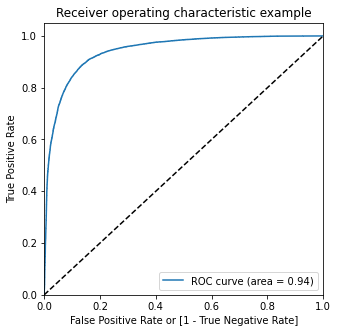

In [117]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

##### Precision Recall TradeOff

##### In order to select the optimal cut off point , from the list of predicted probabilities, we will use this curve. Here we got the cut off point as 0.57

In [118]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.106404,0,1,1,0,0,0,0,0,0,0,0
1,0,0.000741,1,1,0,0,0,0,0,0,0,0,0
2,0,0.107112,2,1,1,0,0,0,0,0,0,0,0
3,0,0.042239,3,1,0,0,0,0,0,0,0,0,0
4,0,0.199653,4,1,1,0,0,0,0,0,0,0,0


In [119]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

             prob  accuracy    sensi    speci
0.000000 0.000000  0.500000 1.000000 0.000000
0.100000 0.100000  0.772832 0.978263 0.567400
0.200000 0.200000  0.829024 0.960019 0.698030
0.300000 0.300000  0.856808 0.941514 0.772102
0.400000 0.400000  0.870204 0.917796 0.822613
0.500000 0.500000  0.875599 0.889908 0.861291
0.600000 0.600000  0.872055 0.849249 0.894860
0.700000 0.700000  0.859153 0.791858 0.926449
0.800000 0.800000  0.824880 0.694276 0.955484
0.900000 0.900000  0.768948 0.558799 0.979097


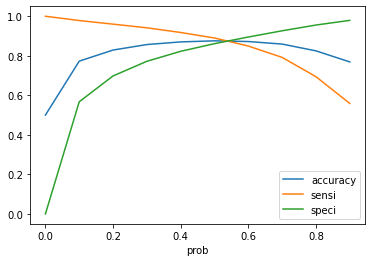

In [120]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.57 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.106404,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.000741,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.107112,2,1,1,0,0,0,0,0,0,0,0,0
3,0,0.042239,3,1,0,0,0,0,0,0,0,0,0,0
4,0,0.199653,4,1,1,0,0,0,0,0,0,0,0,0


##### Train Accuracy

In [122]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8734101334445371

##### Recall - Train

In [124]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.861707673060884

##### Recall - Test

In [125]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8823592207099012

##### Making predictions on the test data

In [126]:
X_test_rfe = X_test[col]

In [127]:
X_test_sm = sm.add_constant(X_test_rfe)
y_test_pred = res5.predict(X_test_sm)
y_test_pred.head()

29360   0.942785
49979   0.149037
90612   0.020166
87007   0.079483
91852   0.286258
dtype: float64

In [128]:
y_test_df = pd.DataFrame(y_test)

y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

y_pred_final.head()

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

y_pred_final.head()

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.57 else 0)

y_pred_final.head()

,churn,Converted_Prob,final_predicted
29360,0,0.942785,1
49979,0,0.149037,0
90612,0,0.020166,0
87007,0,0.079483,0
91852,0,0.286258,0


#### Test accuracy

In [129]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8627276765881831

##### Recall - Test

In [130]:
from sklearn.metrics import precision_score, recall_score
recall_score(y_pred_final.churn, y_pred_final.final_predicted)

0.6532467532467533

##### Precision - Test

In [131]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.churn, y_pred_final.final_predicted)

0.34171195652173914

##### From the above model if we see the most important variables in the prediction are :

##### 1) aon 
##### 2) monthly_2g_8
##### 3) monthly_3g_8
##### 4) monthly_3g_6
##### 5) monthly_2g_6

##### Now further we are making models using PCA ( Principal Component Analysis )

##### Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation.

In [132]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(random_state=42)

In [134]:
pca.fit(X_train)

PCA(random_state=42)

#### PCA components

In [135]:
pca.components_

array([[ 5.74099044e-02,  1.15613647e-01, -4.50480591e-02, ...,
         3.01061610e-03, -2.89510563e-03,  5.03654971e-02],
       [ 1.21648492e-01,  1.85513273e-01,  1.34431730e-01, ...,
         5.72324793e-03,  3.71276582e-03, -1.56735098e-02],
       [ 7.64282004e-02,  1.67665972e-01, -2.79665400e-02, ...,
        -8.42148227e-04,  1.23299633e-03, -3.66110123e-03],
       ...,
       [ 1.35451257e-02,  1.75659303e-02, -5.74839873e-02, ...,
        -1.68594387e-03, -6.89234297e-03,  3.24220554e-03],
       [-1.08059458e-02,  1.93977742e-02,  1.06774470e-01, ...,
         1.76382586e-03,  1.16310946e-04,  5.79863006e-04],
       [-6.07061611e-03,  6.16149305e-03,  1.38166902e-02, ...,
         3.04691134e-03,  2.39848485e-03, -9.17954695e-04]])

#### PCA Variance Factor

In [136]:
pca.explained_variance_ratio_

array([1.04599420e-01, 8.42831218e-02, 5.61214526e-02, 5.13271933e-02,
       4.17641219e-02, 3.87915921e-02, 3.61473281e-02, 3.51058947e-02,
       3.08684144e-02, 2.85442312e-02, 2.59464956e-02, 2.20724693e-02,
       2.08294670e-02, 1.96617611e-02, 1.85645152e-02, 1.73402270e-02,
       1.65387790e-02, 1.42691212e-02, 1.39587339e-02, 1.32161059e-02,
       1.19701179e-02, 1.11605546e-02, 1.07985925e-02, 1.05564679e-02,
       1.00411655e-02, 9.65018781e-03, 9.27462936e-03, 8.83032188e-03,
       8.64436782e-03, 8.43139914e-03, 8.03441104e-03, 7.89522716e-03,
       7.42603205e-03, 7.37675655e-03, 6.90578665e-03, 6.71056219e-03,
       6.40643009e-03, 6.22308029e-03, 6.20439997e-03, 6.06016497e-03,
       5.78489379e-03, 5.69452402e-03, 5.50729276e-03, 5.17605480e-03,
       4.95643963e-03, 4.87835568e-03, 4.68275164e-03, 4.35642088e-03,
       4.23852384e-03, 4.09097321e-03, 3.90660323e-03, 3.67945060e-03,
       3.53606773e-03, 3.43626715e-03, 3.37602663e-03, 3.33401212e-03,
      

In [137]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

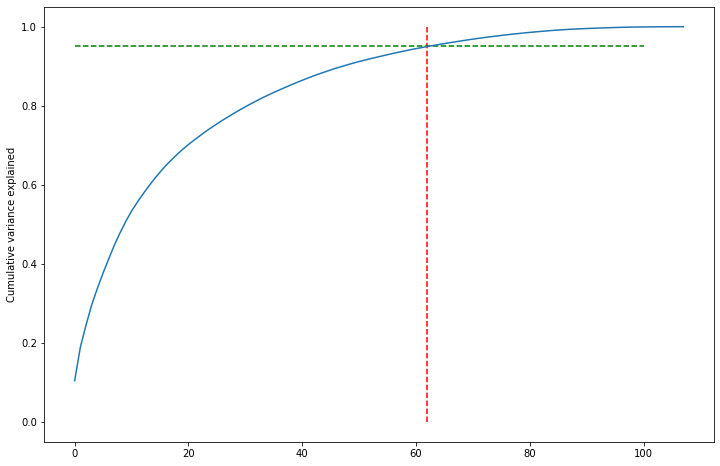

In [139]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=62, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

#### If we look at the graph we can clearly see that to get a cummulative variance of 95% explained we will require atleast 62 variables

#### Applying PCA on train data set

In [140]:
from sklearn.decomposition import IncrementalPCA

In [141]:
pca_final = IncrementalPCA(n_components=62)

In [142]:
df_train_pca = pca_final.fit_transform(X_train)

In [143]:
df_train_pca.shape

(38368, 62)

#### Correlation matrix

##### From the correlation matrix is clearly evident that all the PCA components are not correlated to other and share a high negative correlation

In [144]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [145]:
corrmat.shape

(62, 62)

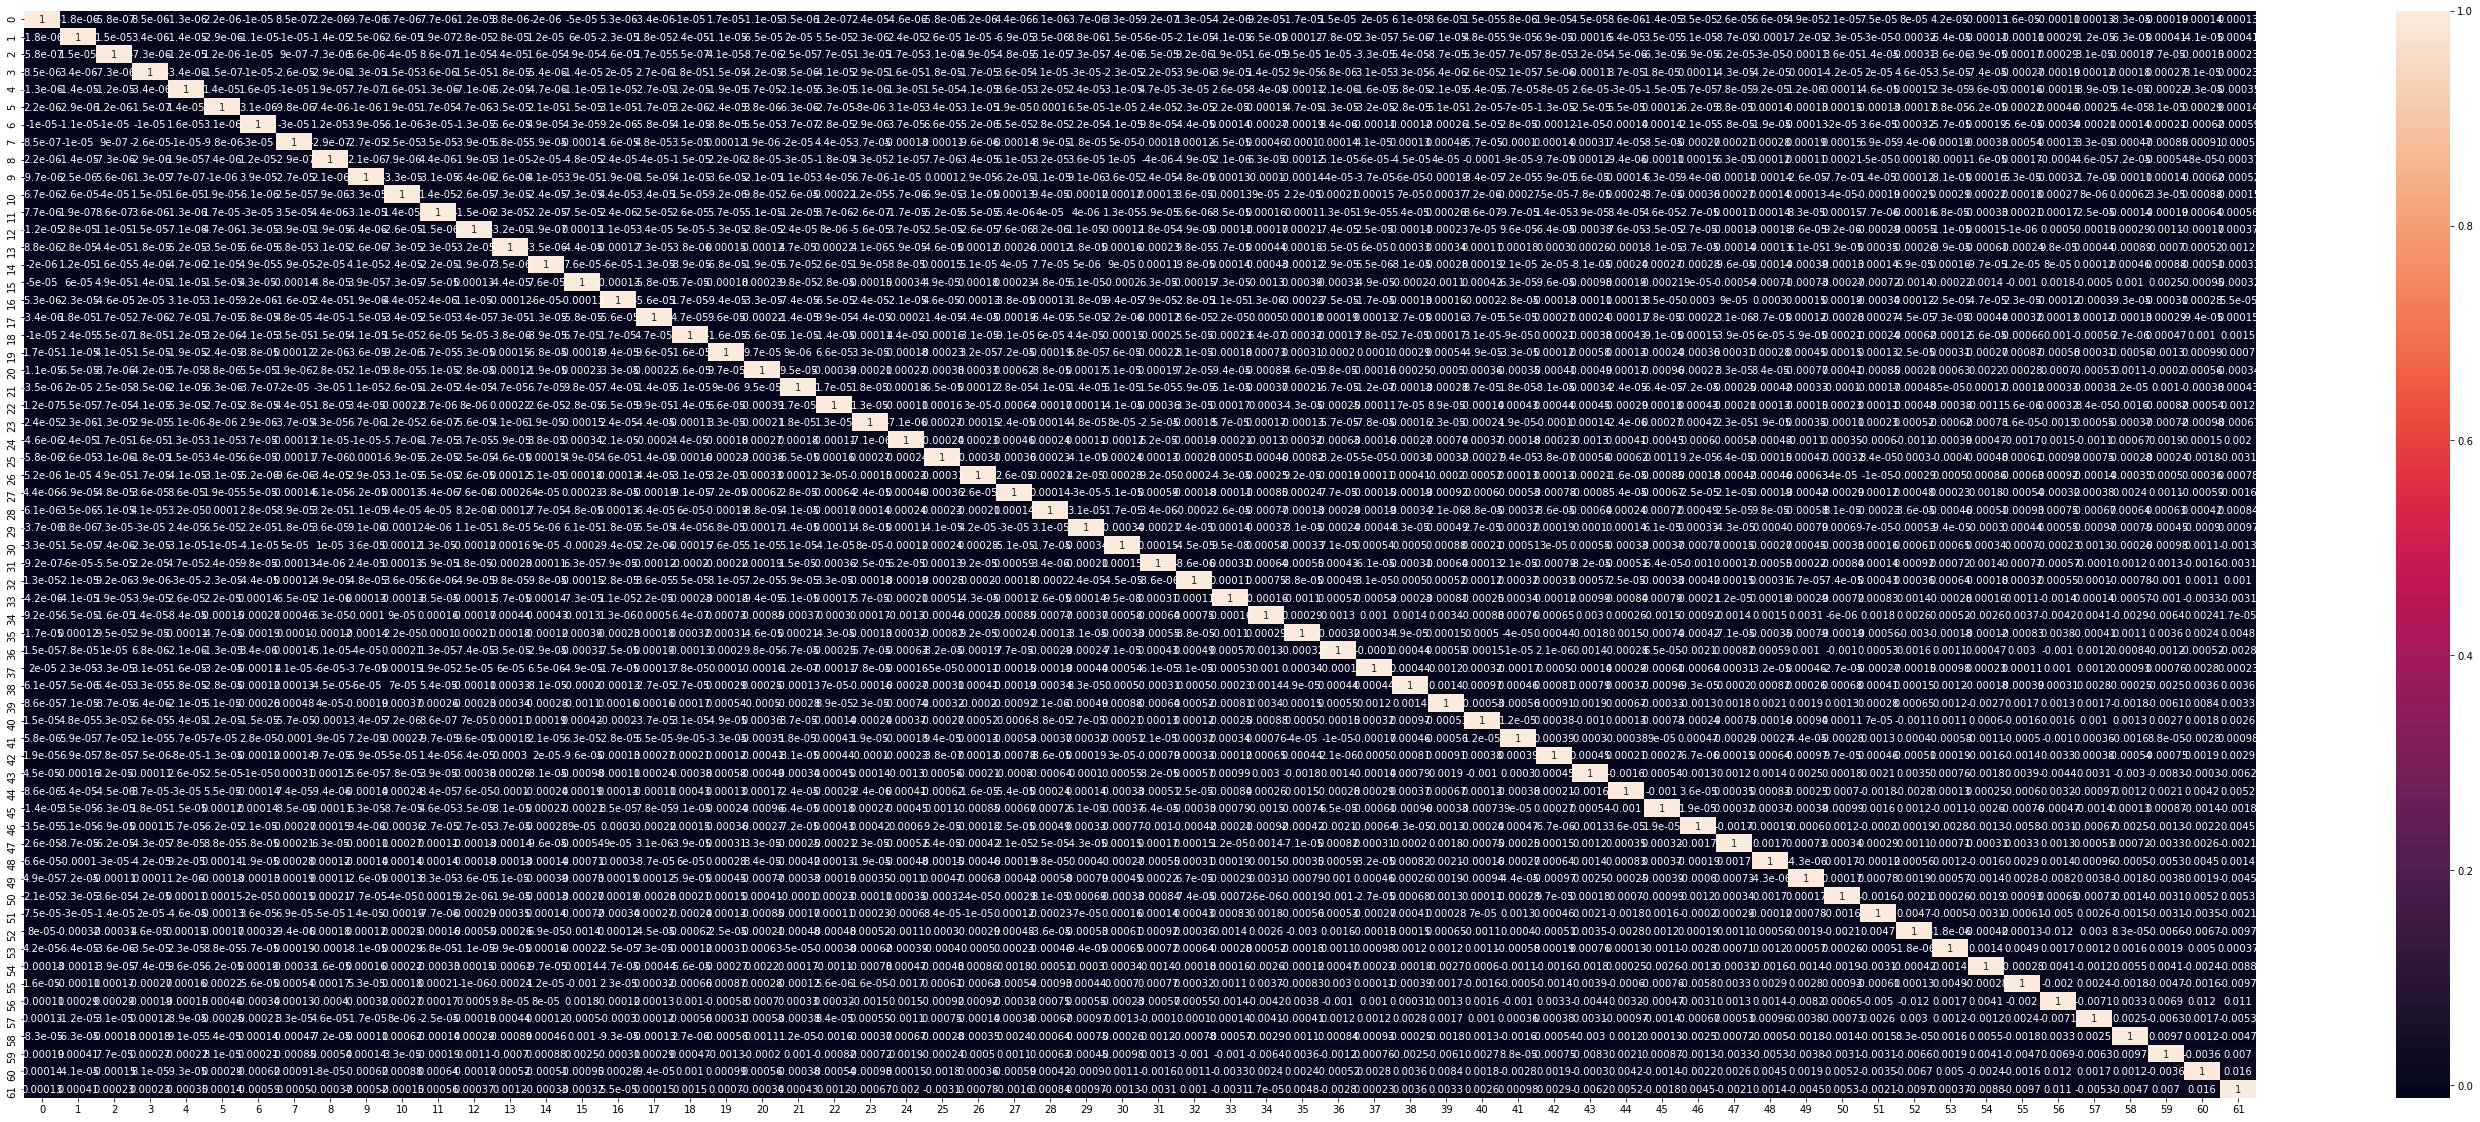

In [148]:
plt.figure(figsize=[50,20])
sns.heatmap(corrmat, annot=True);

#### Applying PCA on test data

In [149]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 62)

In [150]:
# creating a accuracy dataframe
acc_df = pd.DataFrame()
acc_df


""


In [151]:
# creating a output dataframe
out_df = pd.DataFrame()
tmp = pd.DataFrame({'Actual Value':y_test})
tmp.reset_index(drop=True,inplace=True)
out_df = pd.concat([out_df,tmp],axis=1)
out_df

,Actual Value
0,0
1,0
2,0
3,0
4,0
...,...
8999,0
9000,0
9001,0
9002,0


#### Model 1 Applying Logistic Regression using PCA

#### Using RFE in the final model and using Grid Search CV

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 2, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 64))}]


# step-3: perform grid search

lm = LogisticRegression()
lm.fit(df_train_pca, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(df_train_pca, y_train)    

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

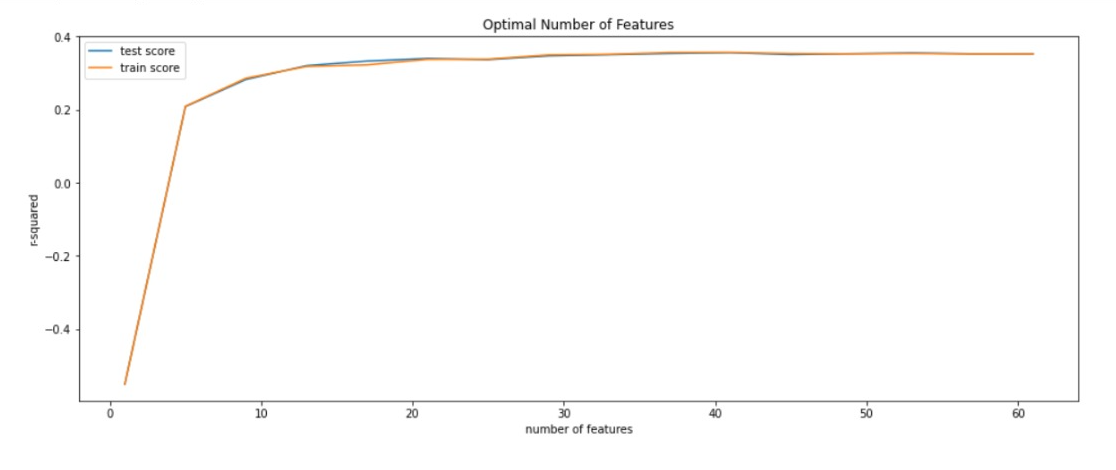

In [ ]:
model_cv.best_params_

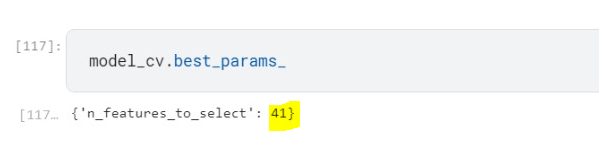

In [153]:
import sklearn.metrics

# final model
n_features_optimal = 41

lm = LogisticRegression()
lm.fit(df_train_pca, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(df_train_pca, y_train)

# predict prices of X_test
y_pred = lm.predict(df_test_pca)
y_pred[0:10]

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [154]:
tmp = pd.DataFrame({'Logistic Regression':y_pred})
tmp.reset_index(drop=True,inplace=True)
out_df = pd.concat([out_df,tmp],axis=1)
out_df

,Actual Value,Logistic Regression
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
8999,0,0
9000,0,0
9001,0,0
9002,0,1


In [155]:
# train accuracy
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [156]:
y_train_pred = lm.predict(df_train_pca)
train_accuracy1 = metrics.accuracy_score(y_train, y_train_pred)
train_accuracy1

0.8381724353628023

In [157]:
y_test_pred = lm.predict(df_test_pca)
test_accuracy1 = metrics.accuracy_score(y_test, y_test_pred)
test_accuracy1

0.8264104842292315

In [158]:
from sklearn.metrics import precision_score, recall_score
train_recall = recall_score(y_train, y_train_pred)

In [159]:
from sklearn.metrics import precision_score, recall_score
test_recall = recall_score(y_test, y_test_pred)

In [160]:
from sklearn.metrics import precision_score, recall_score
train_precision = precision_score(y_train, y_train_pred)

In [161]:
from sklearn.metrics import precision_score, recall_score
test_precision = precision_score(y_test, y_test_pred)

In [162]:
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train, y_train_pred)

In [163]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_test, y_test_pred)

In [164]:
tmp = pd.DataFrame([['Logistic Regression',train_accuracy1,test_accuracy1,train_recall,train_precision,train_f1,test_recall,test_precision,test_f1]])

In [165]:
tmp.reset_index(drop=True,inplace=True)
acc_df = pd.concat([acc_df,tmp],axis=1)
acc_df

,0,1,2,3,4,5,6,7,8
0,Logistic Regression,0.838172,0.826410,0.850396,0.830102,0.840127,0.824675,0.307804,0.448288


##### Model 2 Using Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 2,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(df_train_pca, y_train)

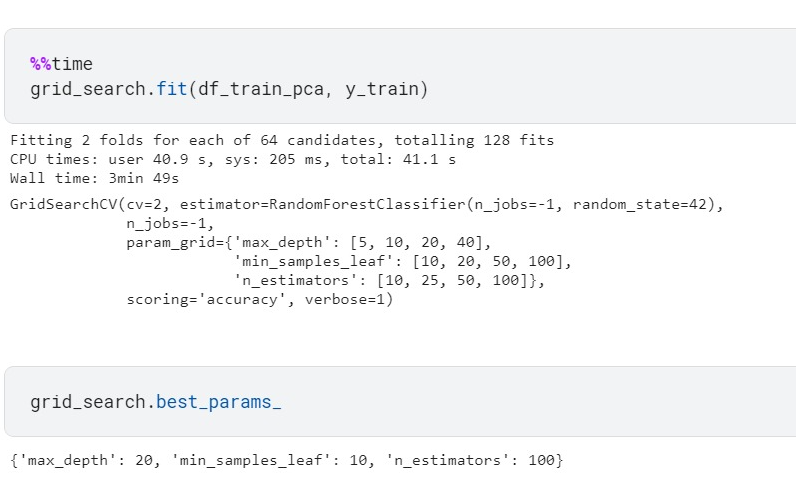

In [167]:
rf = RandomForestClassifier(n_estimators=25, max_depth=20, min_samples_leaf=5, random_state=42, oob_score=True)

In [168]:
rf.fit(df_train_pca, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=25,
                       oob_score=True, random_state=42)

In [169]:
# predict prices of X_test
y_pred = rf.predict(df_test_pca)
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [170]:
tmp = pd.DataFrame({'Random Forest':y_pred})
tmp.reset_index(drop=True,inplace=True)
out_df = pd.concat([out_df,tmp],axis=1)
out_df

,Actual Value,Logistic Regression,Random Forest
0,0,1,1
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
8999,0,0,0
9000,0,0,0
9001,0,0,0
9002,0,1,1


In [171]:
# train accuracy
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [172]:
y_train_pred = rf.predict(df_train_pca)
train_accuracy1 = metrics.accuracy_score(y_train, y_train_pred)
train_accuracy1

0.9802700166805671

In [173]:
y_test_pred = rf.predict(df_test_pca)
test_accuracy1 = metrics.accuracy_score(y_test, y_test_pred)
test_accuracy1

0.8993780541981342

In [174]:
from sklearn.metrics import precision_score, recall_score
train_recall = recall_score(y_train, y_train_pred)

In [175]:
from sklearn.metrics import precision_score, recall_score
test_recall = recall_score(y_test, y_test_pred)

In [176]:
from sklearn.metrics import precision_score, recall_score
train_precision = precision_score(y_train, y_train_pred)

In [177]:
from sklearn.metrics import precision_score, recall_score
test_precision = precision_score(y_test, y_test_pred)

In [178]:
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train, y_train_pred)

In [179]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_test, y_test_pred)

In [180]:
tmp = pd.DataFrame([['Random Forest',train_accuracy1,test_accuracy1,train_recall,train_precision,train_f1,test_recall,test_precision,test_f1]])

In [181]:
tmp.reset_index(drop=True,inplace=True)
acc_df = pd.concat([acc_df,tmp],axis=0)
acc_df

,0,1,2,3,4,5,6,7,8
0,Logistic Regression,0.838172,0.826410,0.850396,0.830102,0.840127,0.824675,0.307804,0.448288
0,Random Forest,0.980270,0.899378,0.990461,0.970677,0.980469,0.616883,0.437385,0.511853


#### Model 3 Using XGBoost

In [184]:
import xgboost as xgb
from sklearn import metrics
from sklearn import model_selection

In [ ]:
# 1st-Run for best hyperparameters
xgb_model = xgb.XGBClassifier()

parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
              'max_depth': [2, 4, 6, 8, 10,20],
              'min_child_weight': [3, 7, 11, 19, 25],
              'n_estimators': [50, 100, 150, 200, 300, 500]}

scorer = metrics.make_scorer(metrics.roc_auc_score,
                             greater_is_better=True,
                             needs_proba=True,
                             needs_threshold=False)

clf_xgb = model_selection.GridSearchCV(estimator=xgb_model,
                                       param_grid=parameters,
                                       n_jobs=-1,
                                       cv=2,
                                       scoring=scorer,
                                       refit=True)

clf_xgb.fit(df_train_pca, y_train)

In [ ]:
print(clf_xgb.best_params_)
print(clf_xgb.best_score_)
print(clf_xgb.best_estimator_)

In [186]:
final_model = xgb.XGBClassifier(learning_rate=0.5,
                                max_depth=20,
                                min_child_weight=100,
                                n_estimators=100)

final_model.fit(df_train_pca, y_train)
print('AUC on train data by XGBoost =', metrics.roc_auc_score(y_true=y_train,
                                                              y_score=final_model.predict_proba(df_train_pca)[:, 1]))

print('AUC on test data by XGBoost =', metrics.roc_auc_score(y_true=y_test,
                                                             y_score=final_model.predict_proba(df_test_pca)[:, 1]))

[00:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC on train data by XGBoost = 0.9978031869586904
AUC on test data by XGBoost = 0.8796344898725273


In [187]:
# predict prices of X_test
y_pred = final_model.predict(df_test_pca)
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [188]:
tmp = pd.DataFrame({'XGBoost':y_pred})
tmp.reset_index(drop=True,inplace=True)
out_df = pd.concat([out_df,tmp],axis=1)
out_df

,Actual Value,Logistic Regression,Random Forest,XGBoost
0,0,1,1,1
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
8999,0,0,0,0
9000,0,0,0,0
9001,0,0,0,0
9002,0,1,1,1


In [189]:
# train accuracy
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [190]:
y_train_pred = final_model.predict(df_train_pca)
train_accuracy1 = metrics.accuracy_score(y_train, y_train_pred)
train_accuracy1

0.9797748123436196

In [191]:
y_test_pred = final_model.predict(df_test_pca)
test_accuracy1 = metrics.accuracy_score(y_test, y_test_pred)
test_accuracy1

0.8904931141714794

### Model Evaluation <a id='modelEvaluation'></a>
Go to [Index](#index).

In [192]:
from sklearn.metrics import precision_score, recall_score
train_recall = recall_score(y_train, y_train_pred)

In [193]:
from sklearn.metrics import precision_score, recall_score
test_recall = recall_score(y_test, y_test_pred)

In [194]:
from sklearn.metrics import precision_score, recall_score
train_precision = precision_score(y_train, y_train_pred)

In [195]:
from sklearn.metrics import precision_score, recall_score
test_precision = precision_score(y_test, y_test_pred)

In [196]:
from sklearn.metrics import f1_score
train_f1 = f1_score(y_train, y_train_pred)

In [197]:
from sklearn.metrics import f1_score
test_f1 = f1_score(y_test, y_test_pred)

In [198]:
tmp = pd.DataFrame([['XGBoost',train_accuracy1,test_accuracy1,train_recall,train_precision,train_f1,test_recall,test_precision,test_f1]])

In [199]:
tmp.reset_index(drop=True,inplace=True)
acc_df = pd.concat([acc_df,tmp],axis=0)
acc_df

,0,1,2,3,4,5,6,7,8
0,Logistic Regression,0.838172,0.826410,0.850396,0.830102,0.840127,0.824675,0.307804,0.448288
0,Random Forest,0.980270,0.899378,0.990461,0.970677,0.980469,0.616883,0.437385,0.511853
0,XGBoost,0.979775,0.890493,0.991243,0.969018,0.980004,0.646753,0.410891,0.502523


In [200]:
acc_df.columns = ['Model Name','Train Accuracy','Test accuracy','Train Precision','Train Recall','Train F1 score','Test Precision','Test Recall','Test F1 score']

In [201]:
acc_df

,Model Name,Train Accuracy,Test accuracy,Train Precision,Train Recall,Train F1 score,Test Precision,Test Recall,Test F1 score
0,Logistic Regression,0.838172,0.826410,0.850396,0.830102,0.840127,0.824675,0.307804,0.448288
0,Random Forest,0.980270,0.899378,0.990461,0.970677,0.980469,0.616883,0.437385,0.511853
0,XGBoost,0.979775,0.890493,0.991243,0.969018,0.980004,0.646753,0.410891,0.502523


#### Out of the following three models we can see the train and test accuracy is high for XGBoost and hence we should use this model for prediction. The only drawback of this model is the lack of interpretation. Since it uses PCA, we do not know the top variables that is significant for the prediction.
#### We recommend giving excellent customer service to the loyal customer with over 3 years of age on network. We also recommend monthly schemes as they have a negative impact on the churn. One hint of a happy customer is the number of outgoing calls he/she makes.